In [11]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [12]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [13]:
# 把兩個訓練資料集和測試資料集讀進來
Titanic_test = pd.read_csv('Titanic_test.csv')
Titanic_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
Titanic_train = pd.read_csv('Titanic_train.csv')
Titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [15]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
Titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
Titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#ans: Titanic_test 少了 column Survived

# Q2: 測試資料集是否有遺失值?

In [17]:
#可以嘗試用範例的程式
#判斷每一個資料點，是否為空值:
print(Titanic_test.isnull().head(5))

# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(Titanic_test.isnull().any())

# 統計 data 裡有空值的變數個數
print(Titanic_test.isnull().any().sum())


   PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0        False   False  False  False  False  False  False   False  False   
1        False   False  False  False  False  False  False   False  False   
2        False   False  False  False  False  False  False   False  False   
3        False   False  False  False  False  False  False   False  False   
4        False   False  False  False  False  False  False   False  False   

   Cabin  Embarked  
0   True     False  
1   True     False  
2   True     False  
3   True     False  
4   True     False  
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3


#ans: 有遺失值 Age, Fare, Cabin

# Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [18]:
#合併資料
#correct
data = Titanic_train.append(Titanic_test)

print(data.info())

print('cabin 遺失個數=',data['Cabin'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
cabin 遺失個數= 1014


23.79929292929293
17.596074065915886


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


23.79929292929293
17.596074065915886


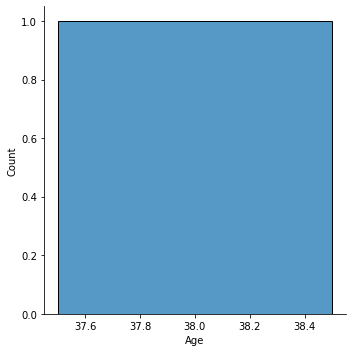

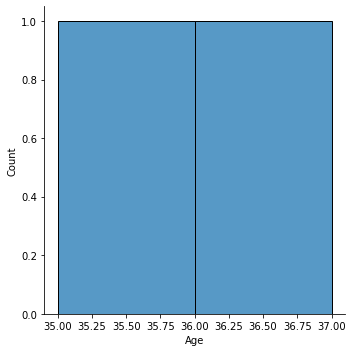

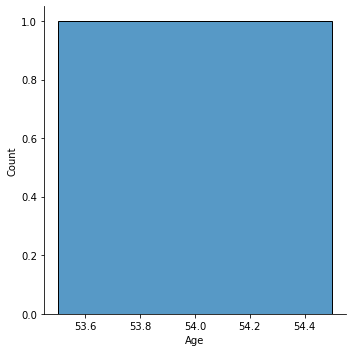

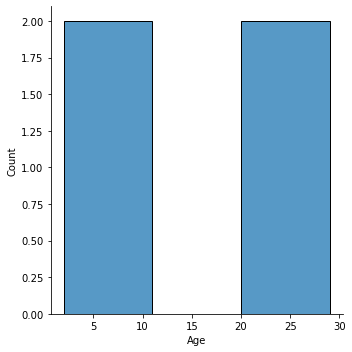

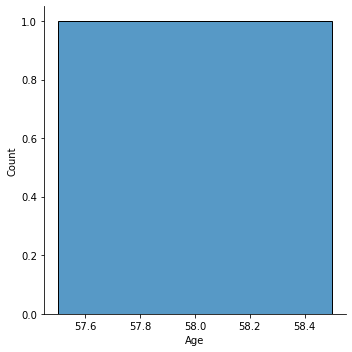

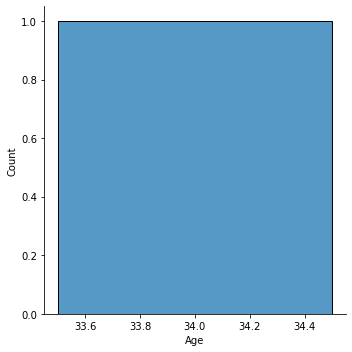

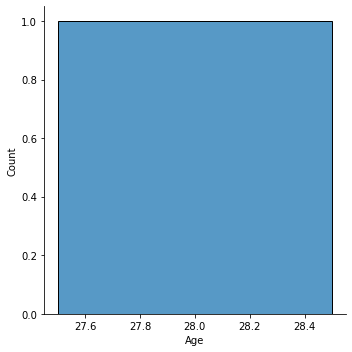

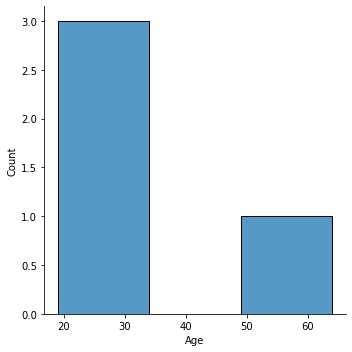

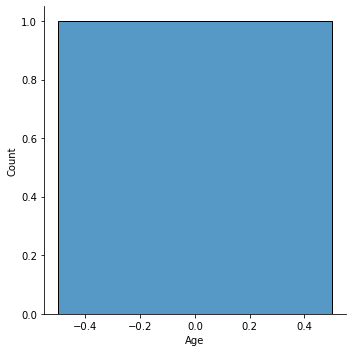

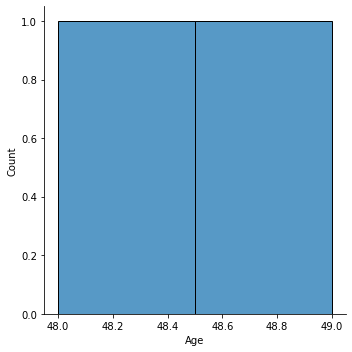

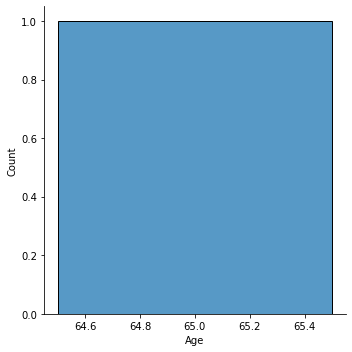

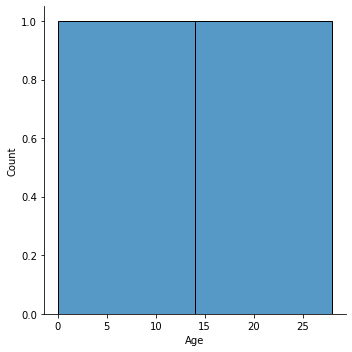

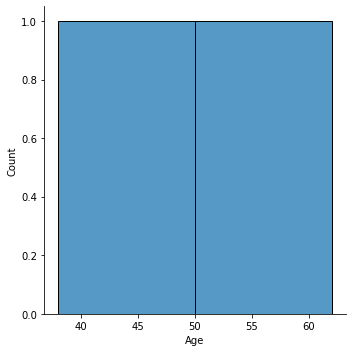

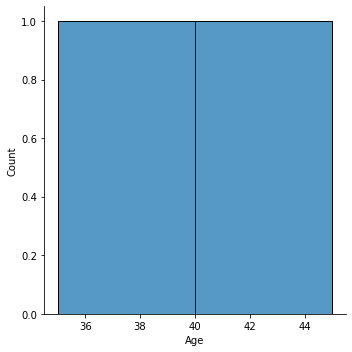

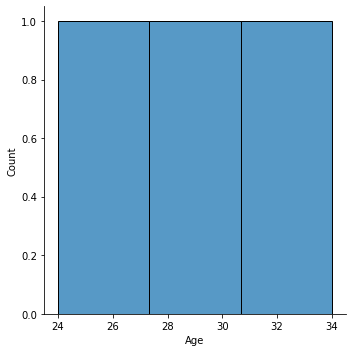

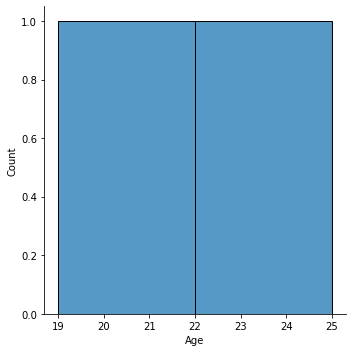

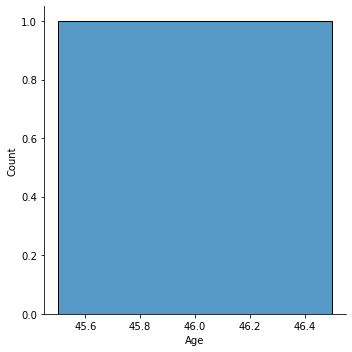

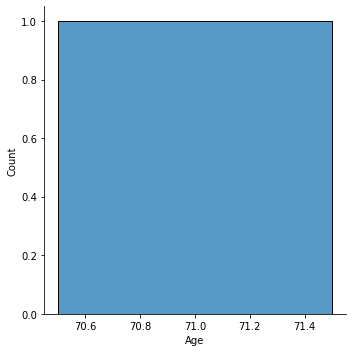

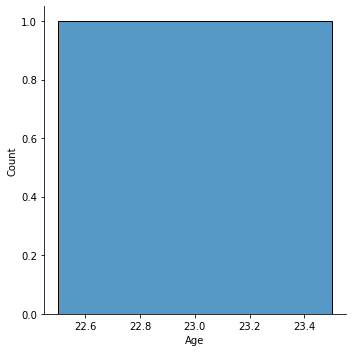

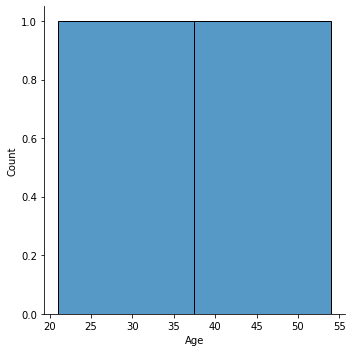

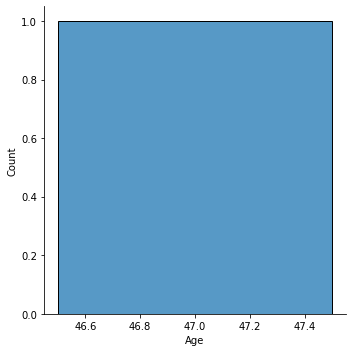

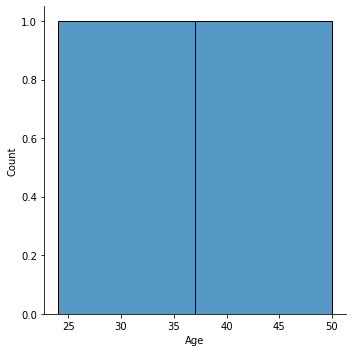

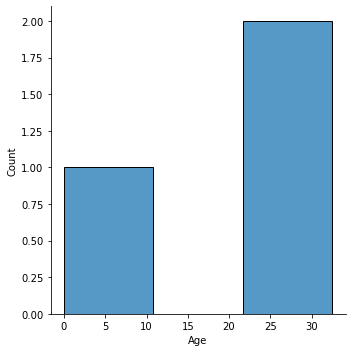

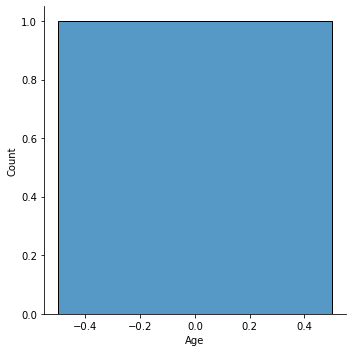

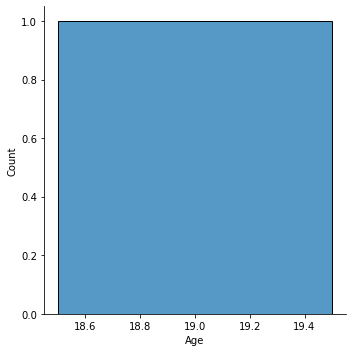

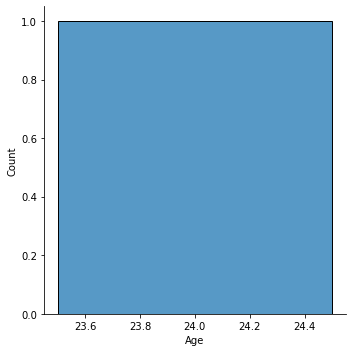

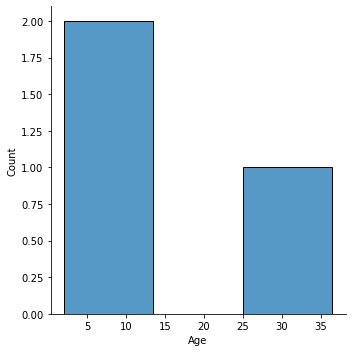

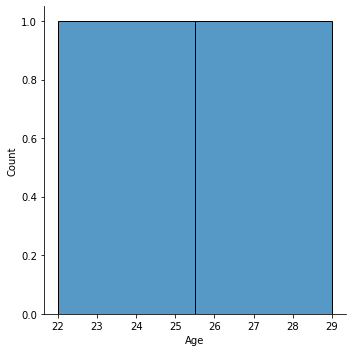

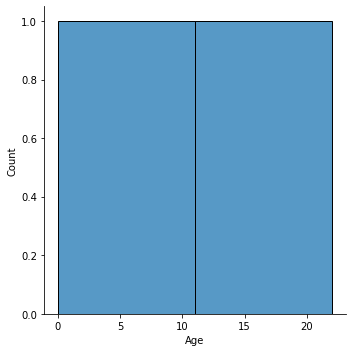

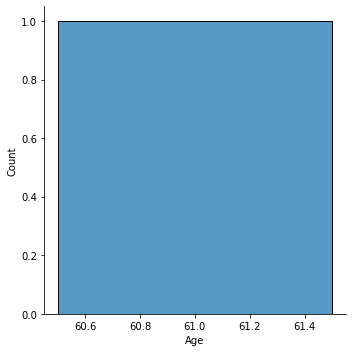

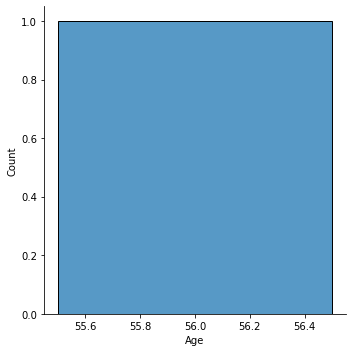

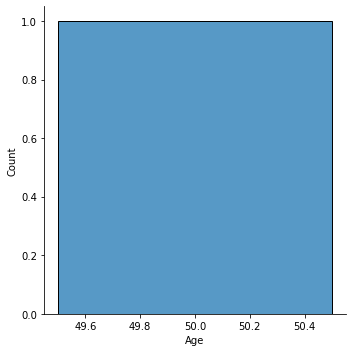

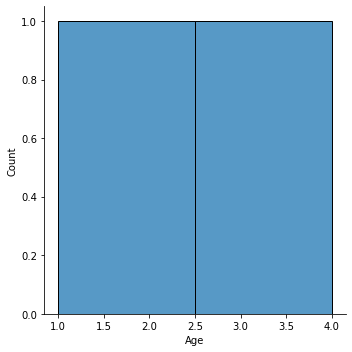

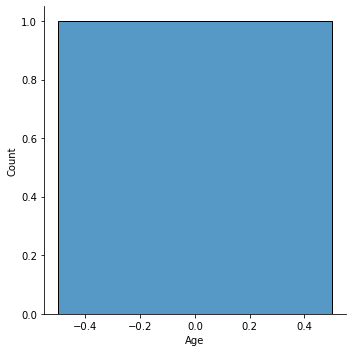

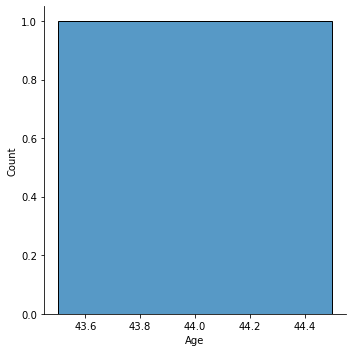

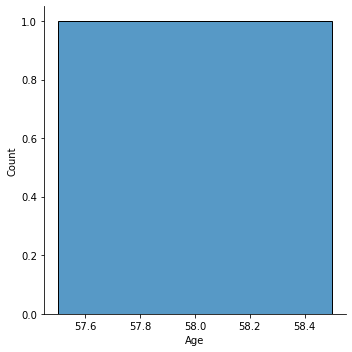

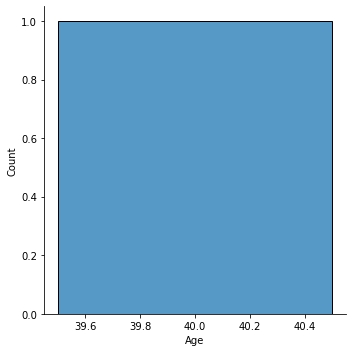

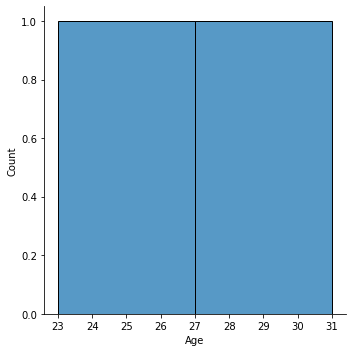

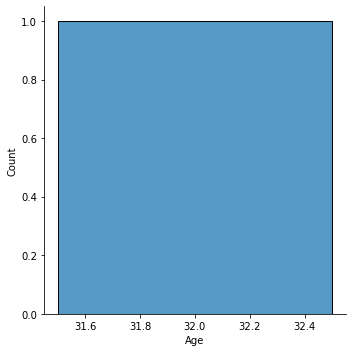

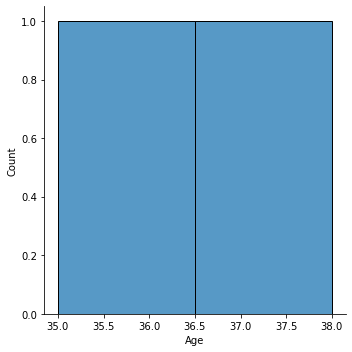

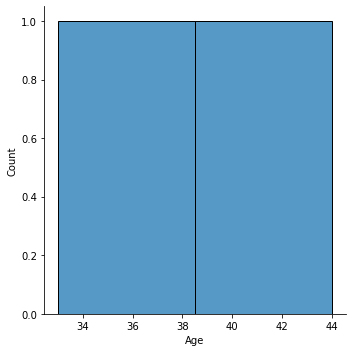

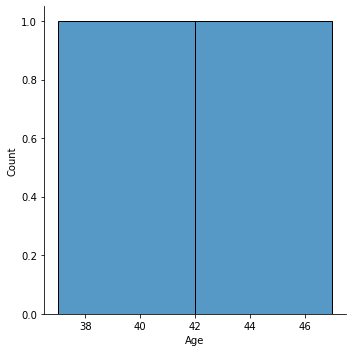

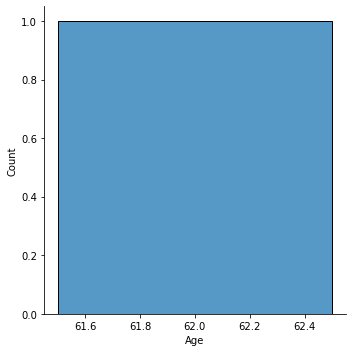

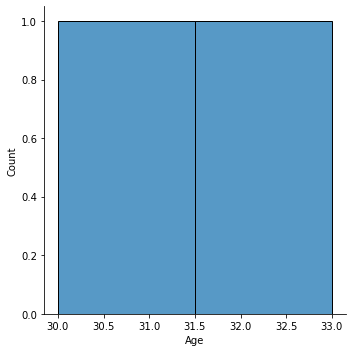

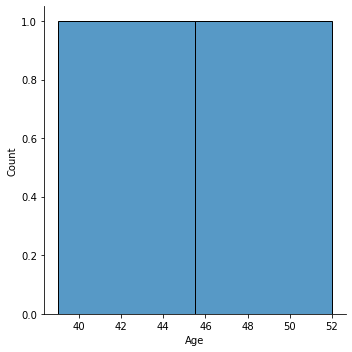

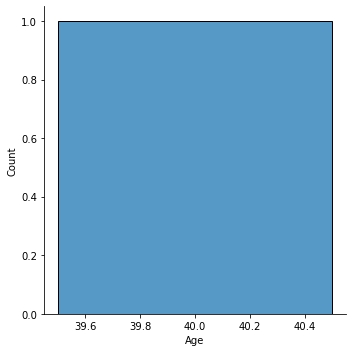

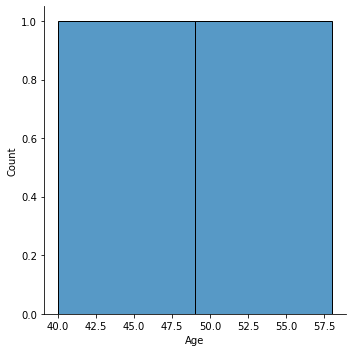

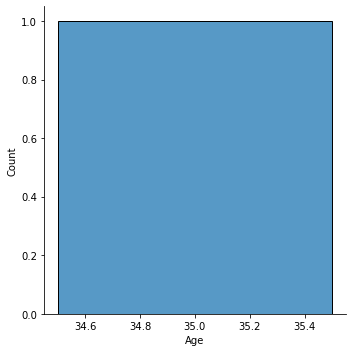

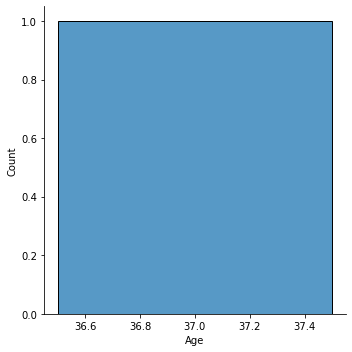

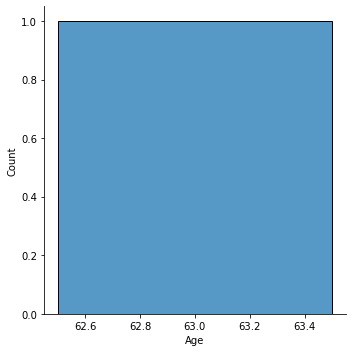

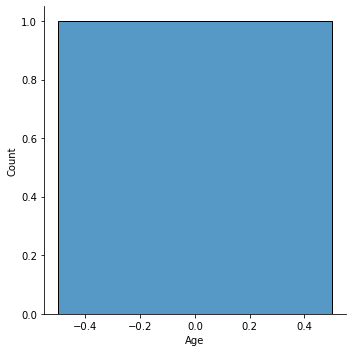

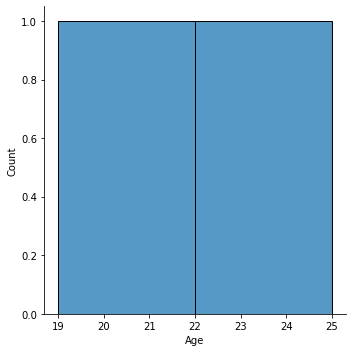

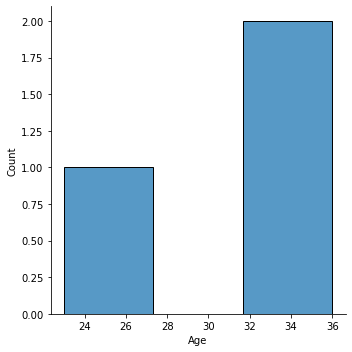

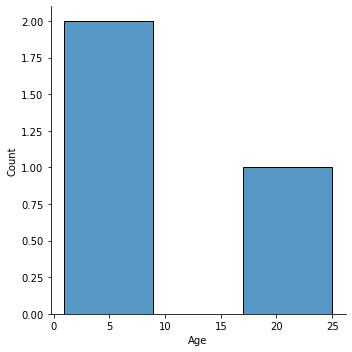

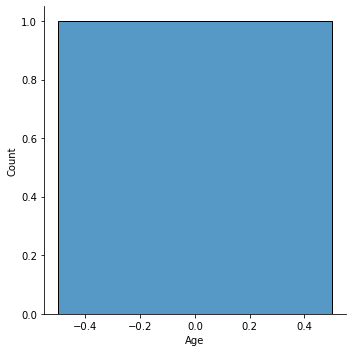

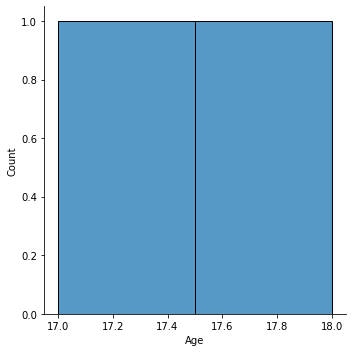

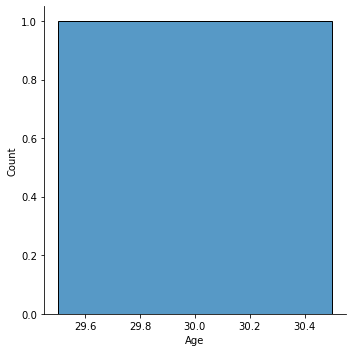

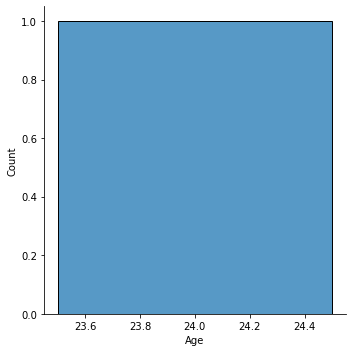

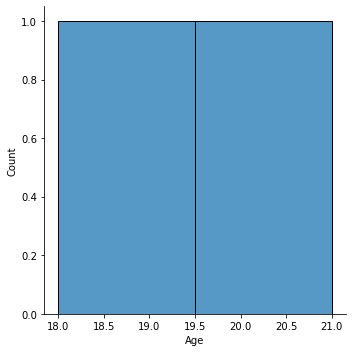

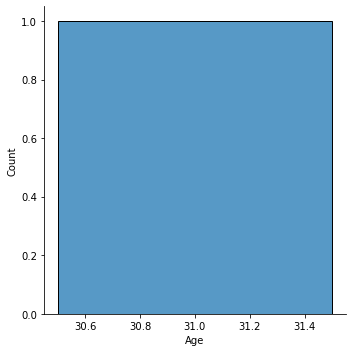

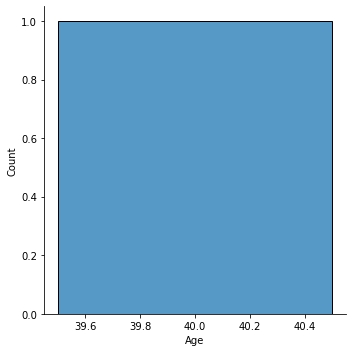

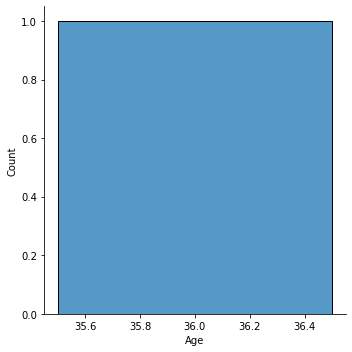

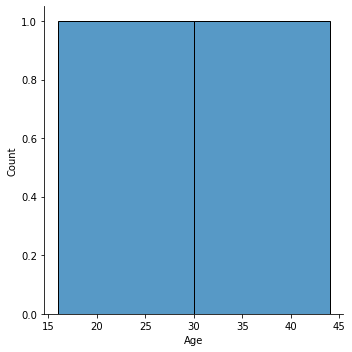

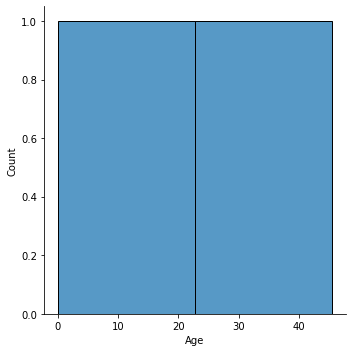

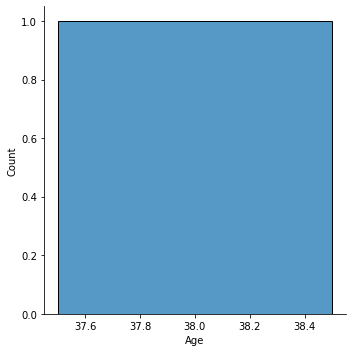

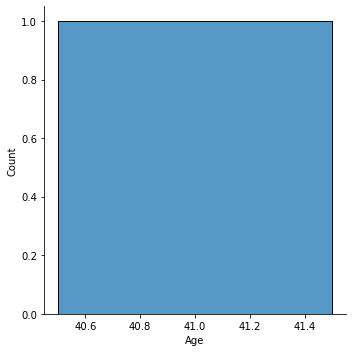

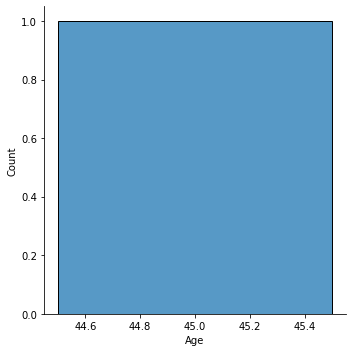

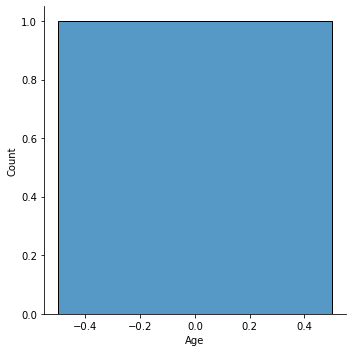

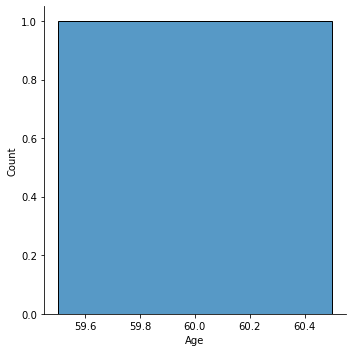

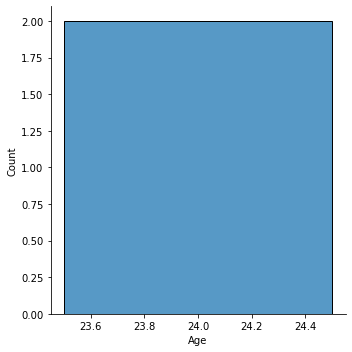

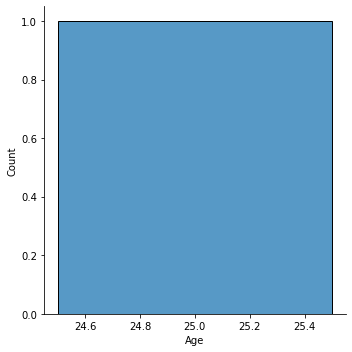

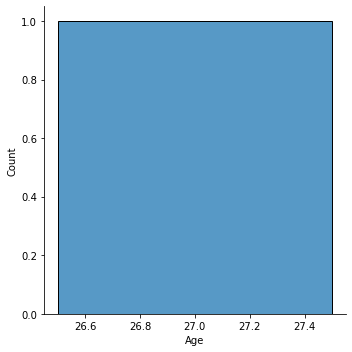

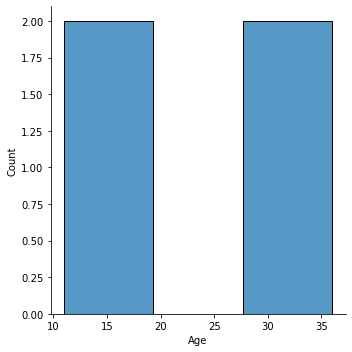

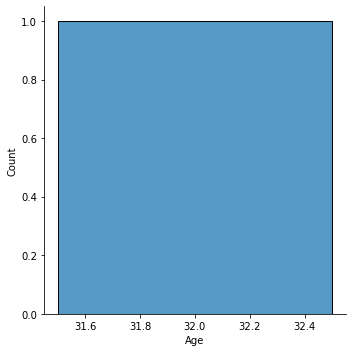

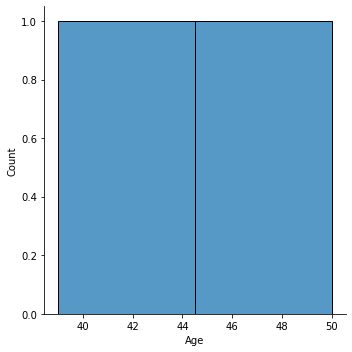

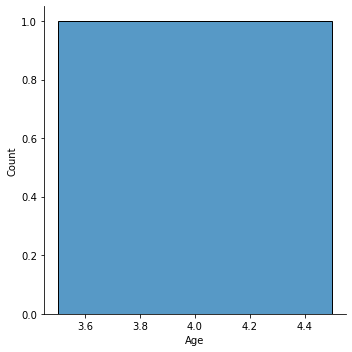

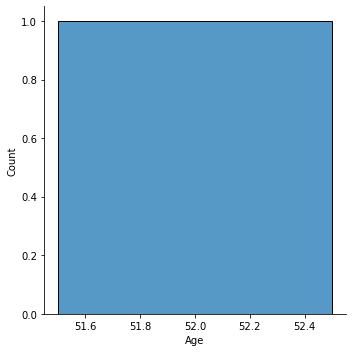

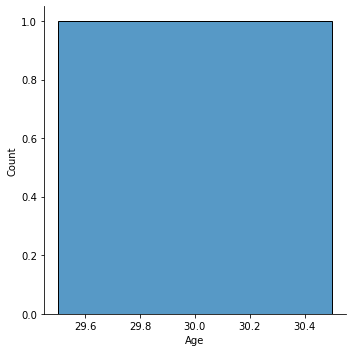

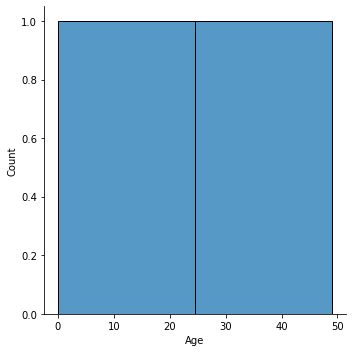

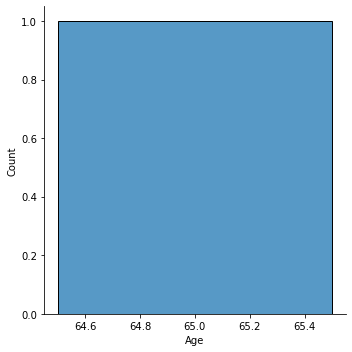

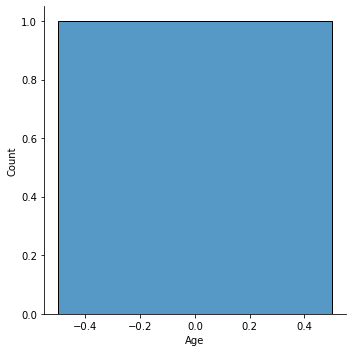

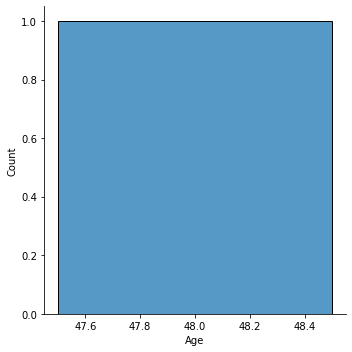

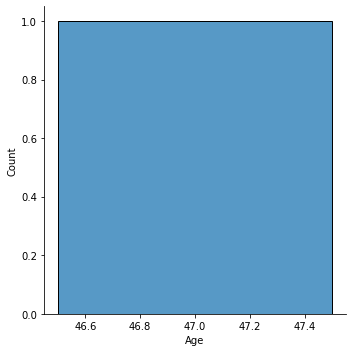

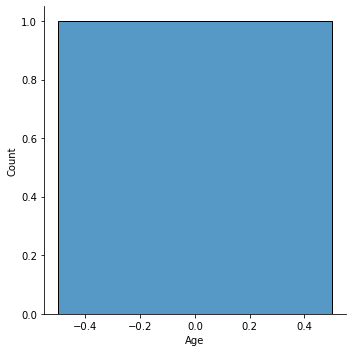

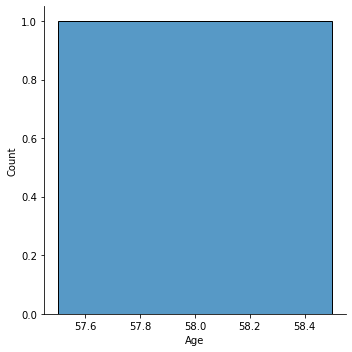

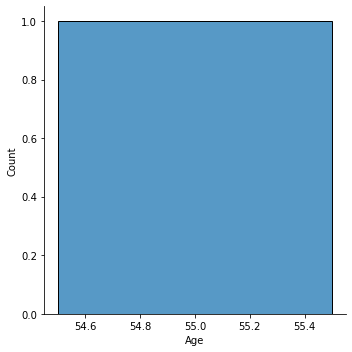

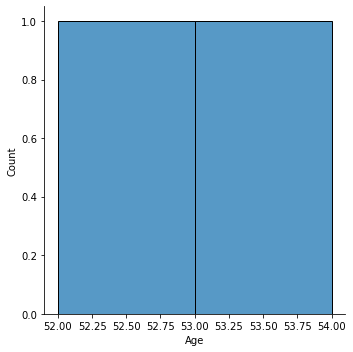

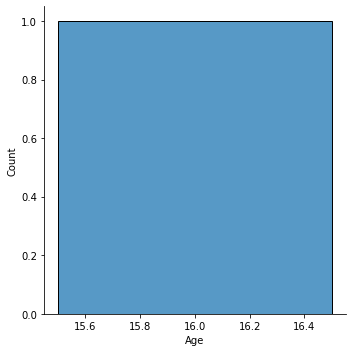

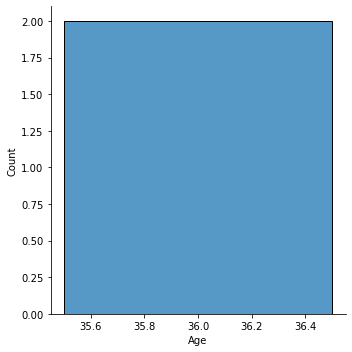

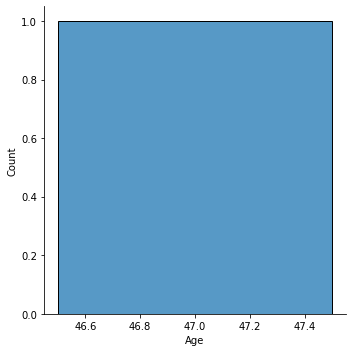

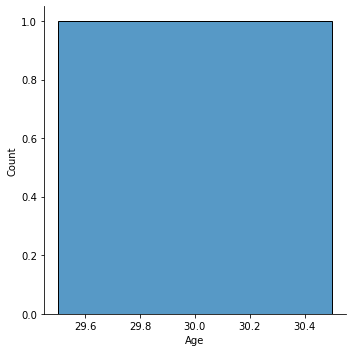

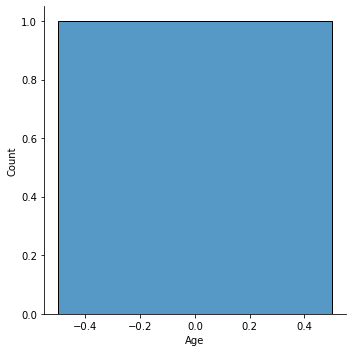

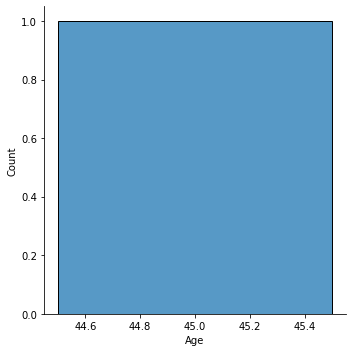

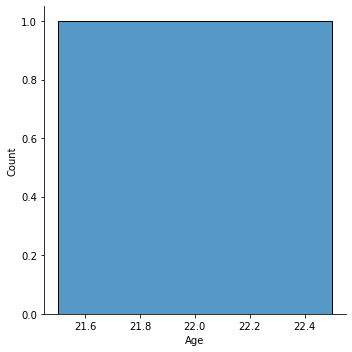

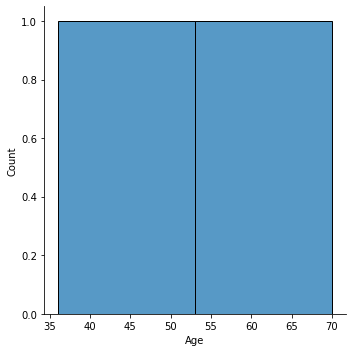

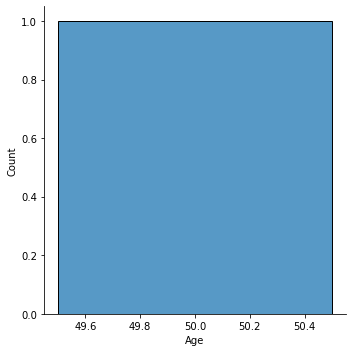

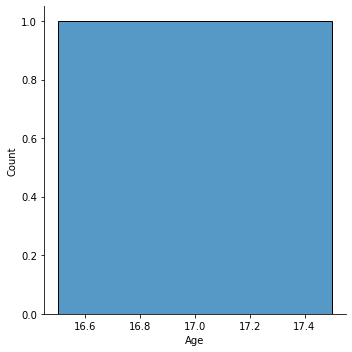

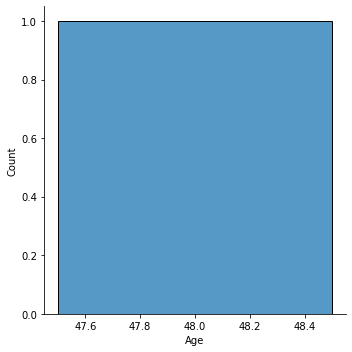

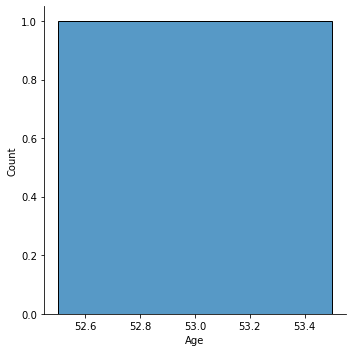

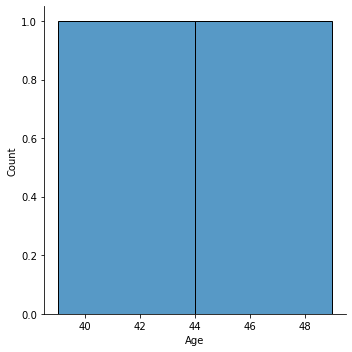

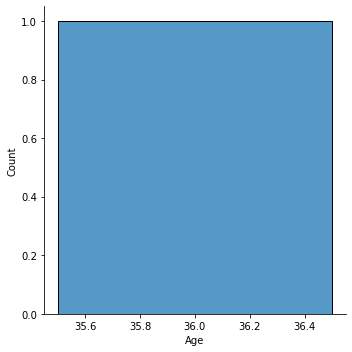

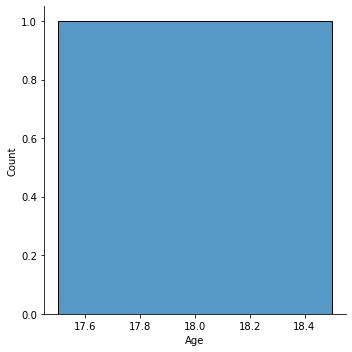

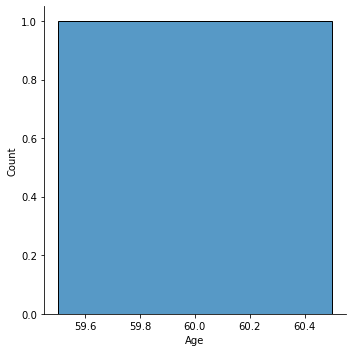

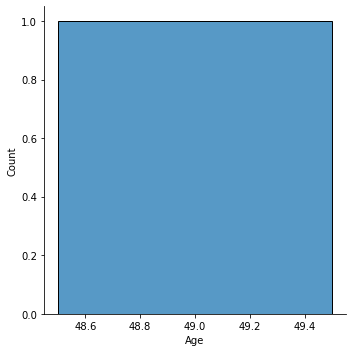

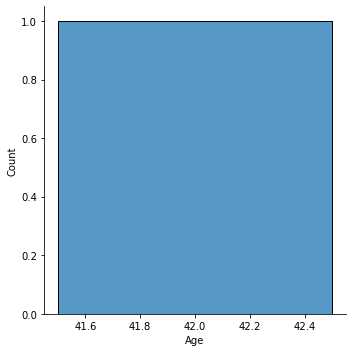

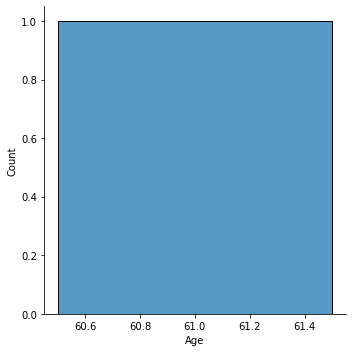

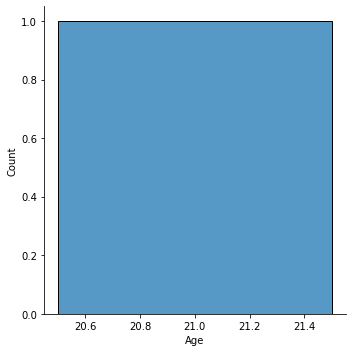

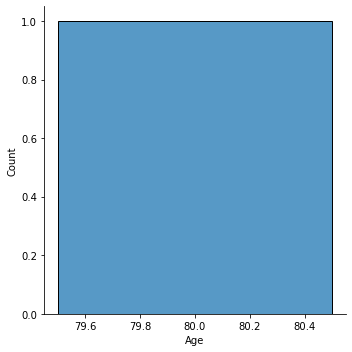

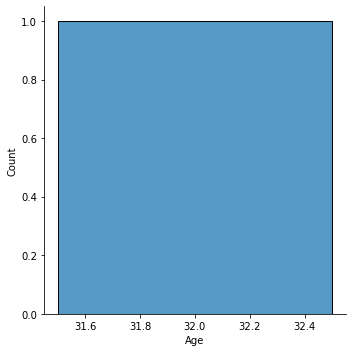

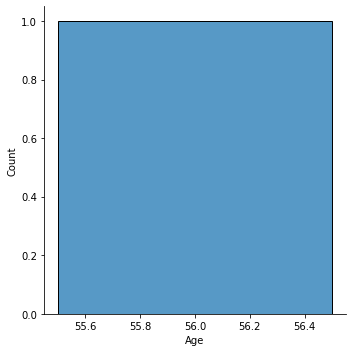

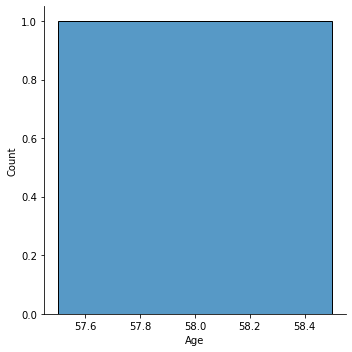

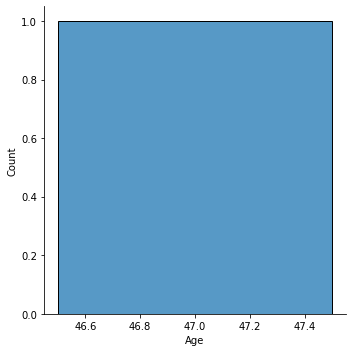

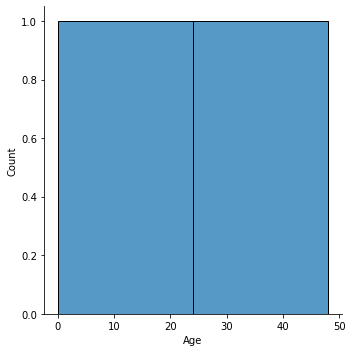

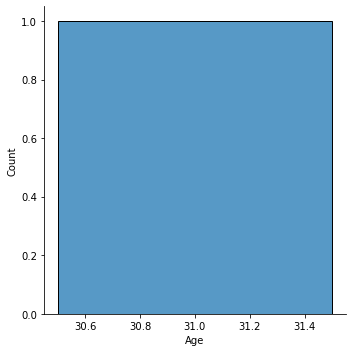

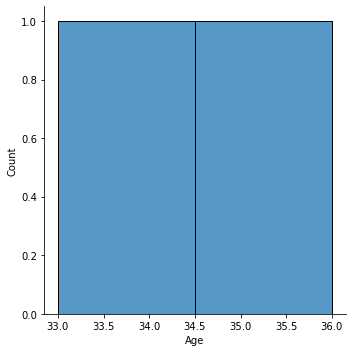

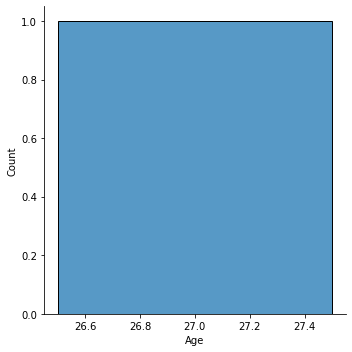

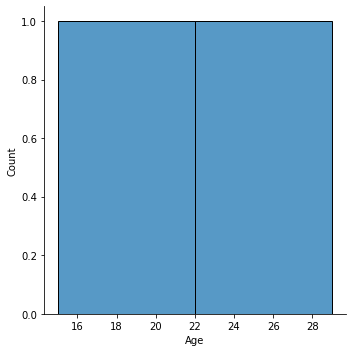

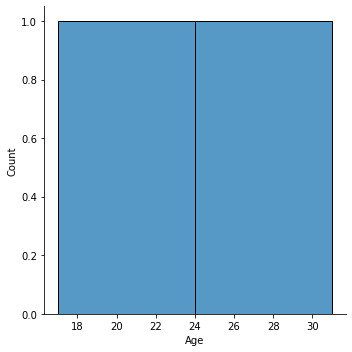

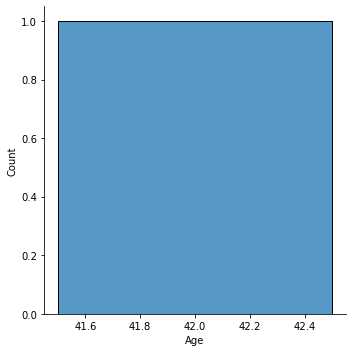

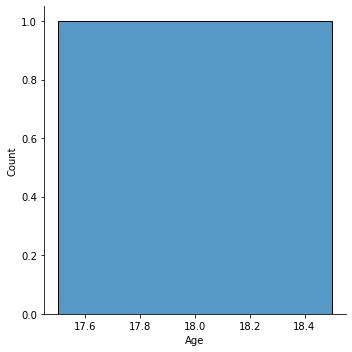

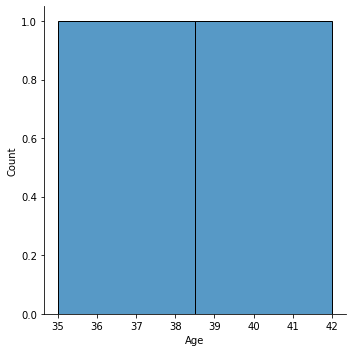

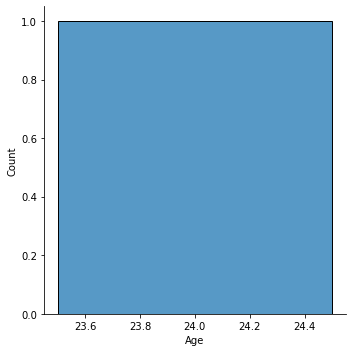

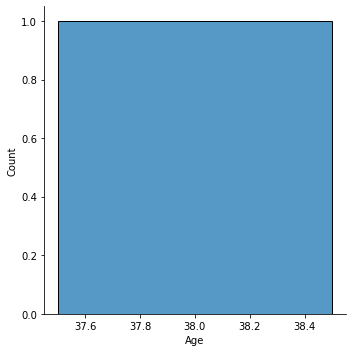

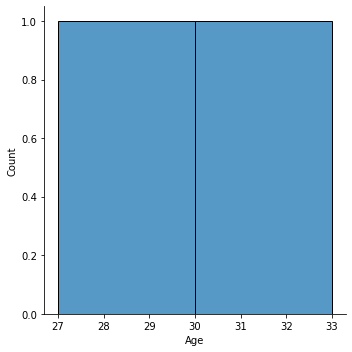

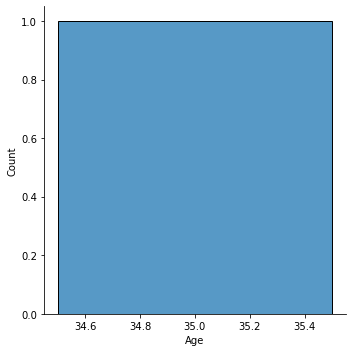

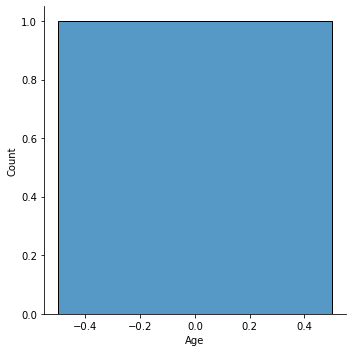

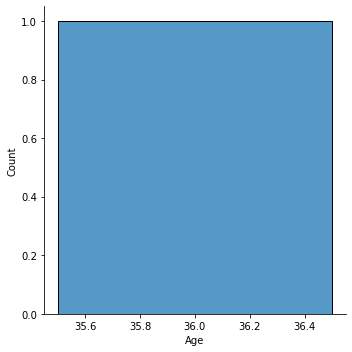

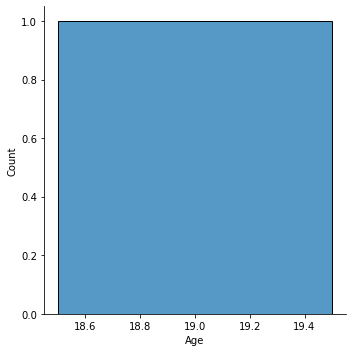

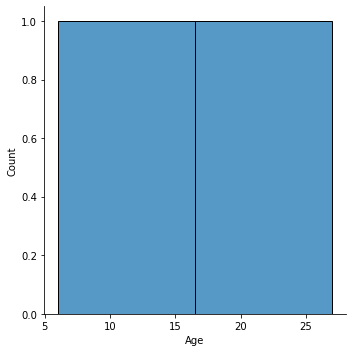

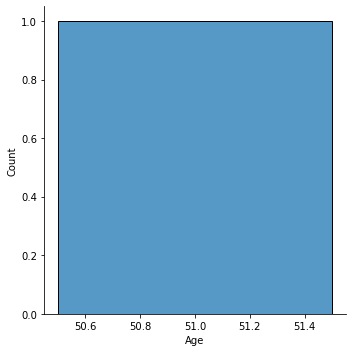

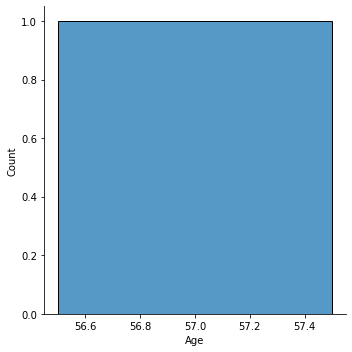

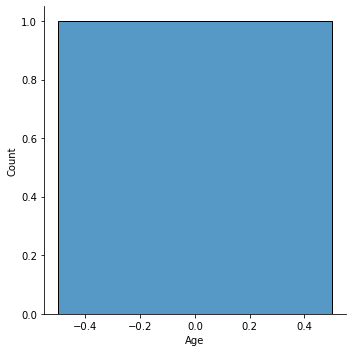

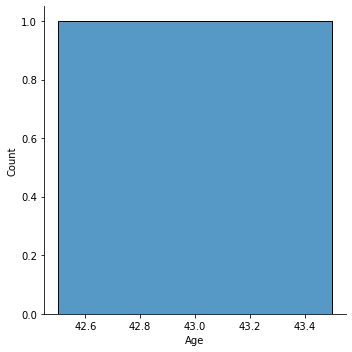

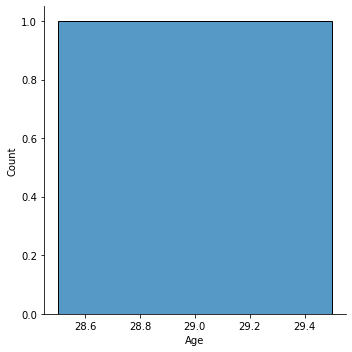

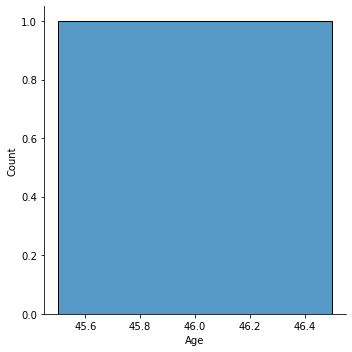

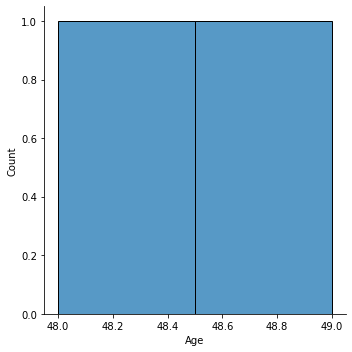

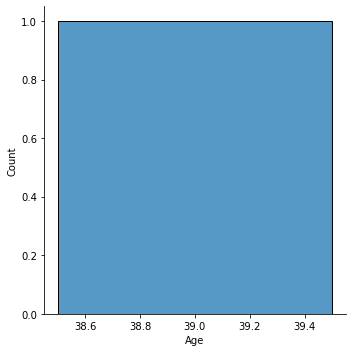

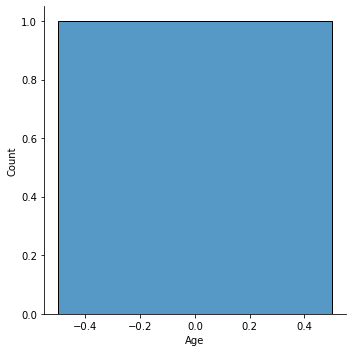

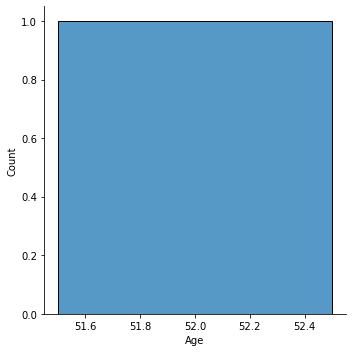

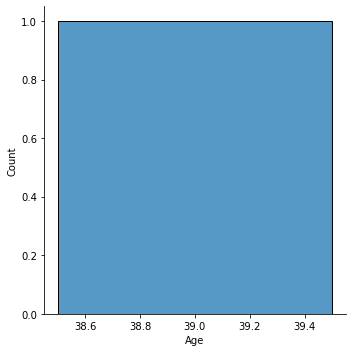

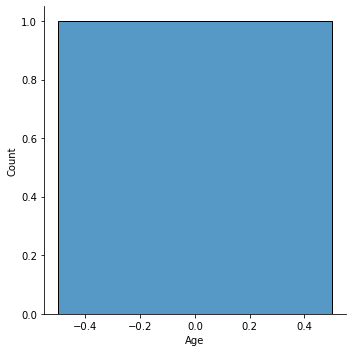

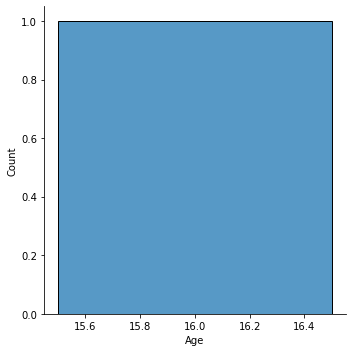

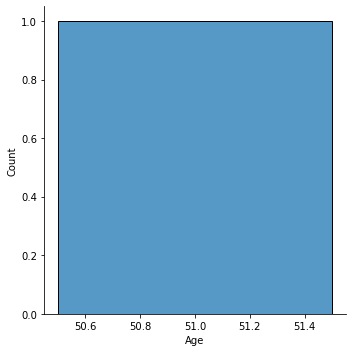

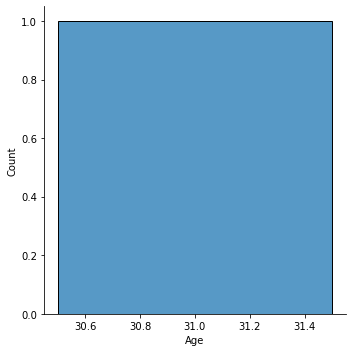

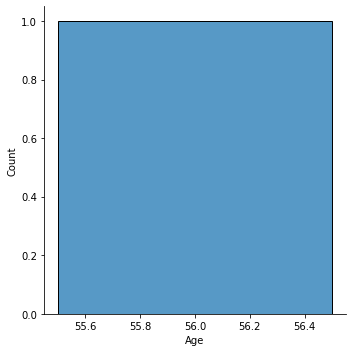

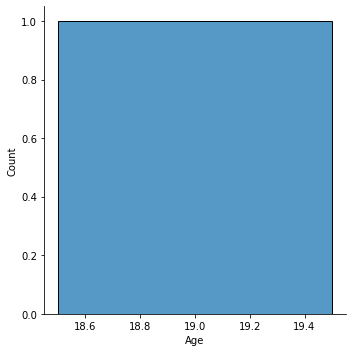

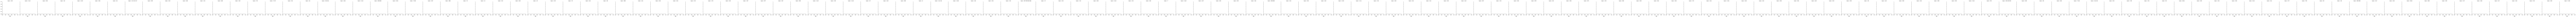

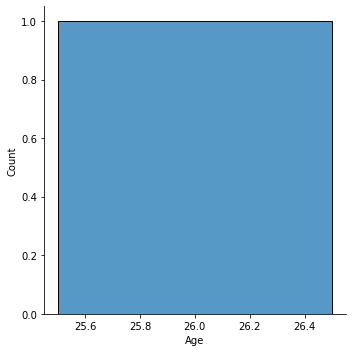

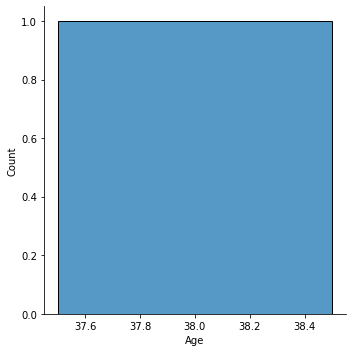

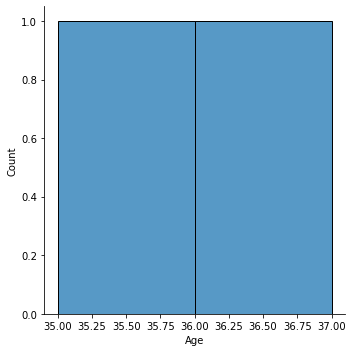

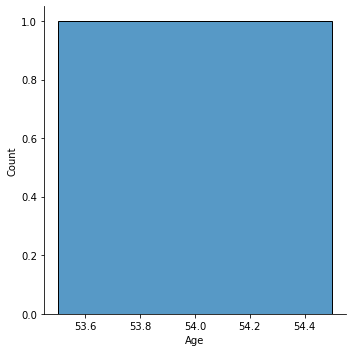

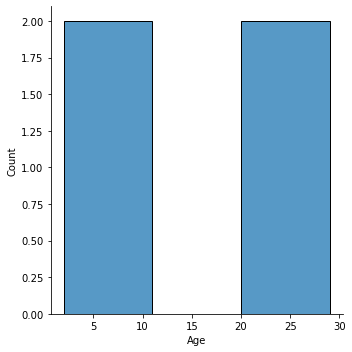

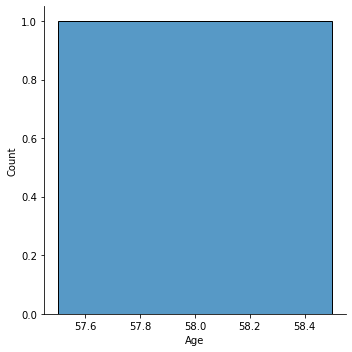

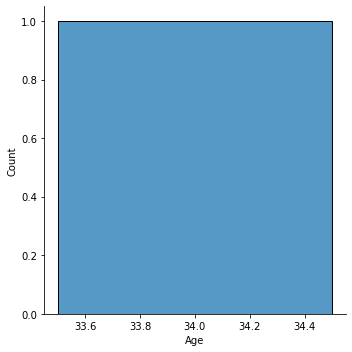

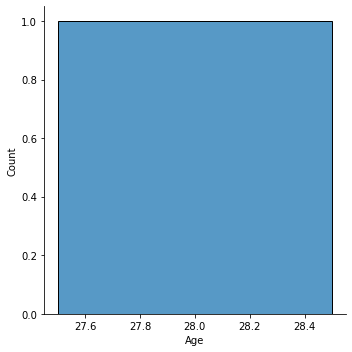

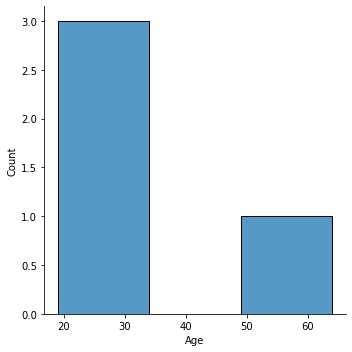

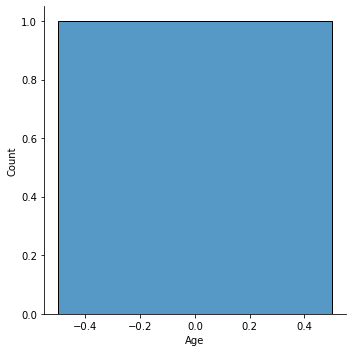

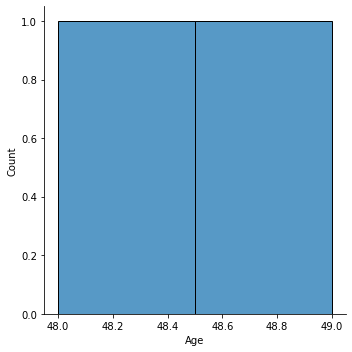

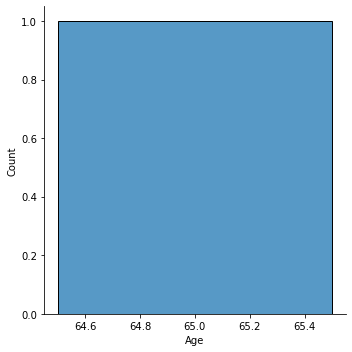

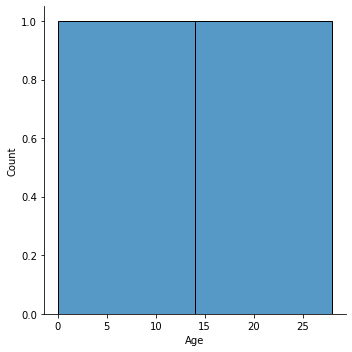

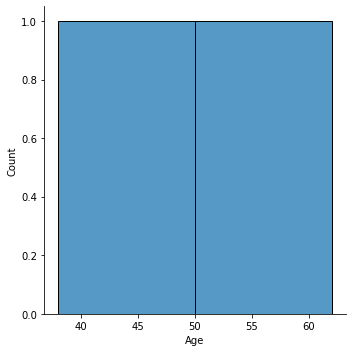

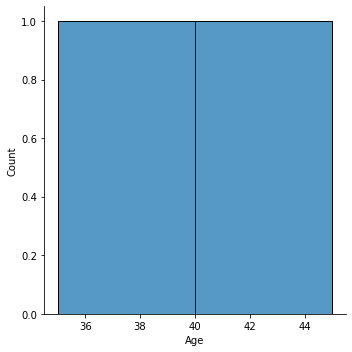

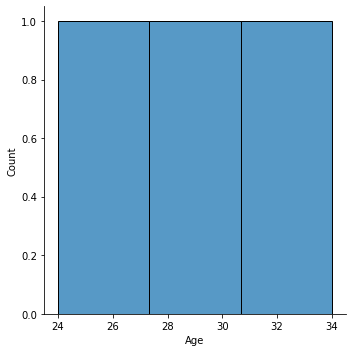

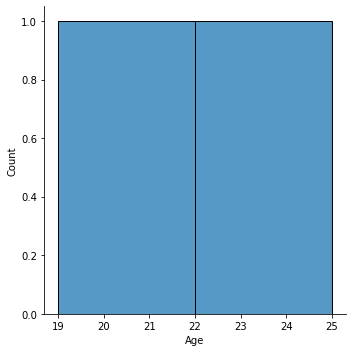

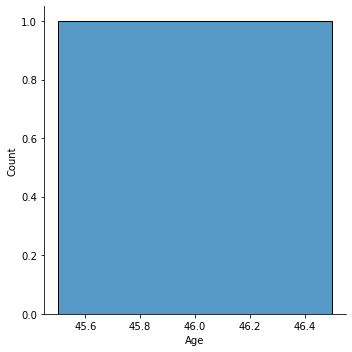

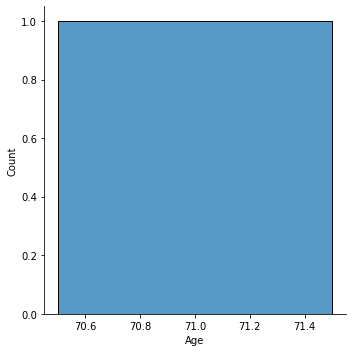

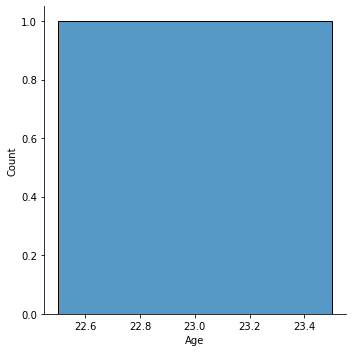

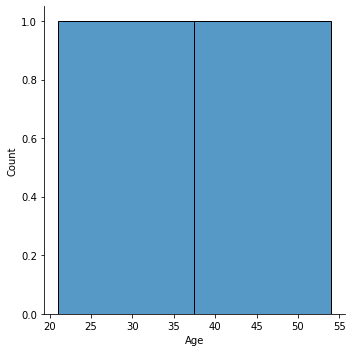

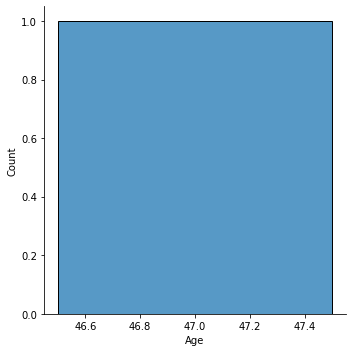

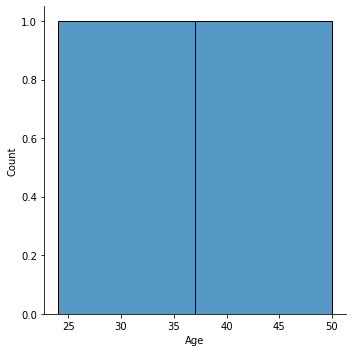

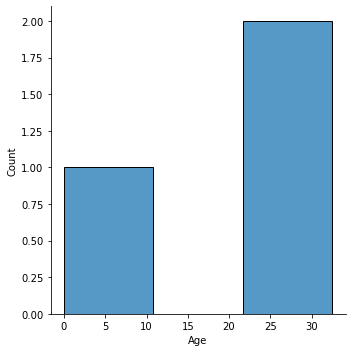

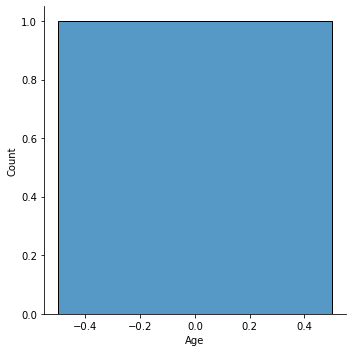

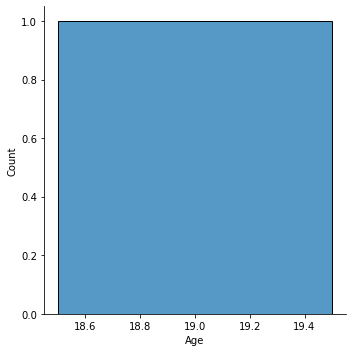

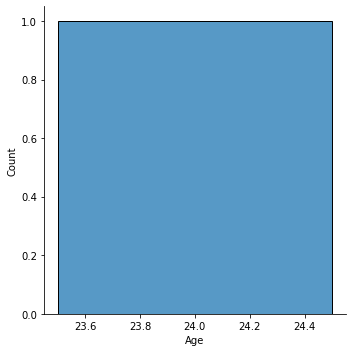

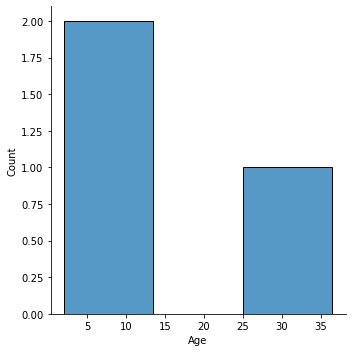

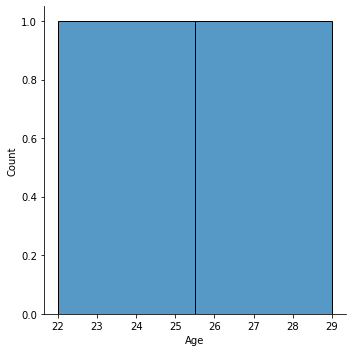

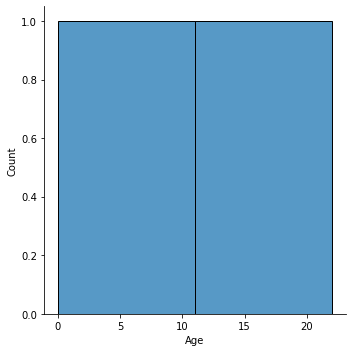

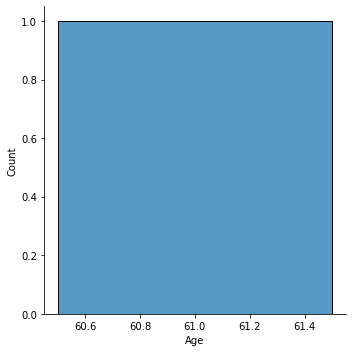

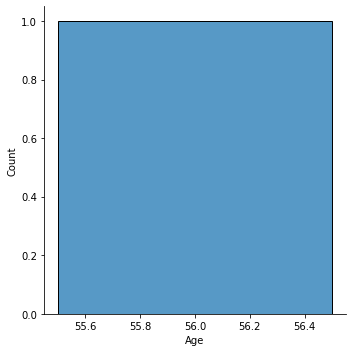

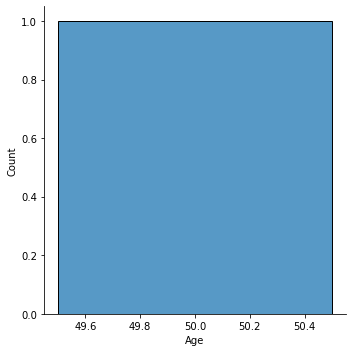

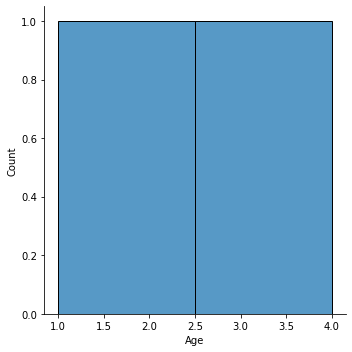

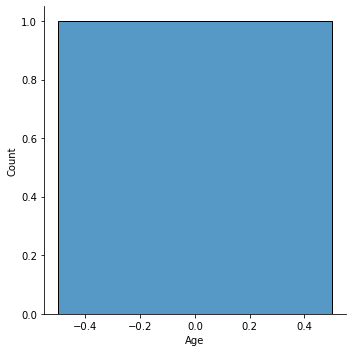

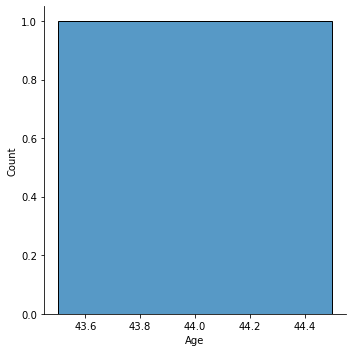

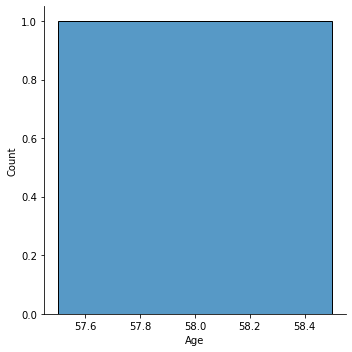

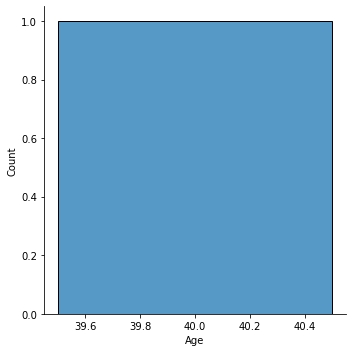

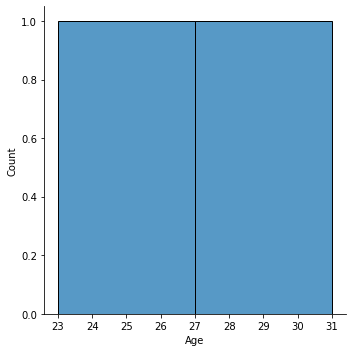

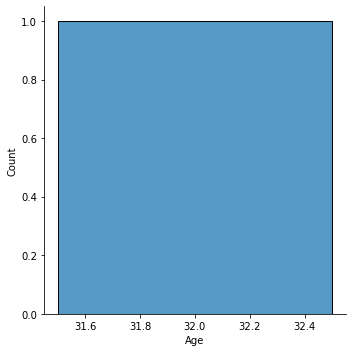

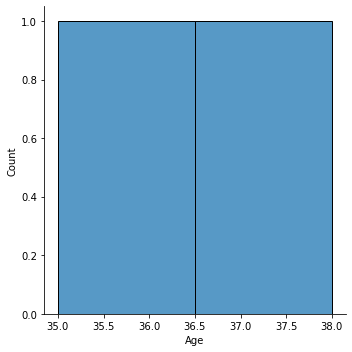

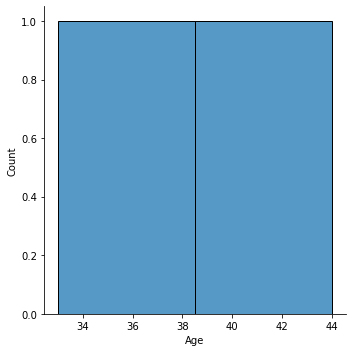

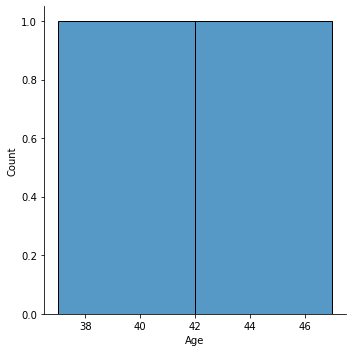

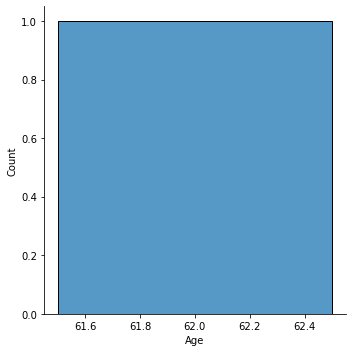

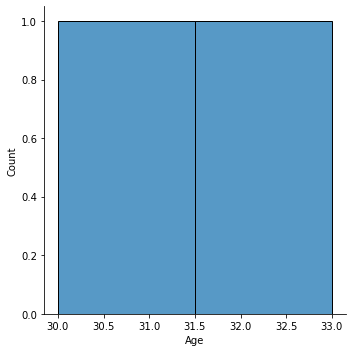

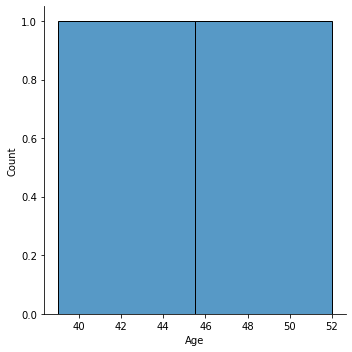

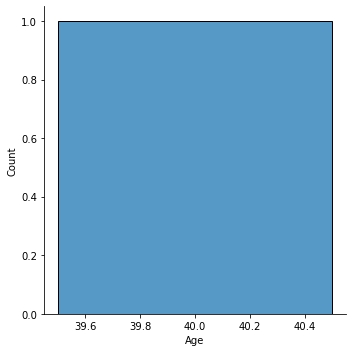

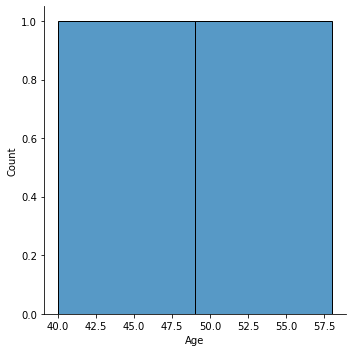

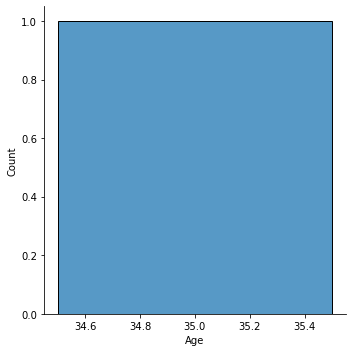

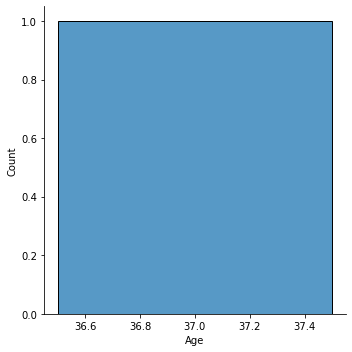

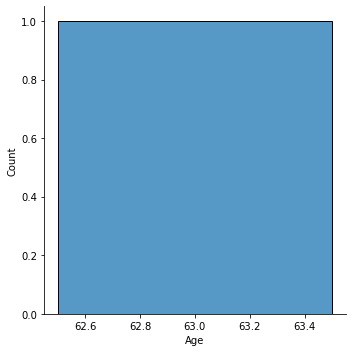

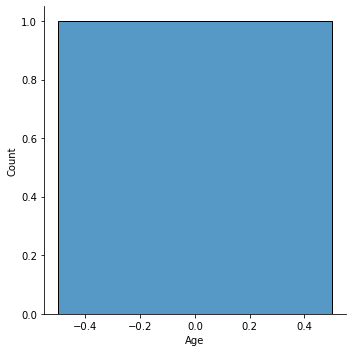

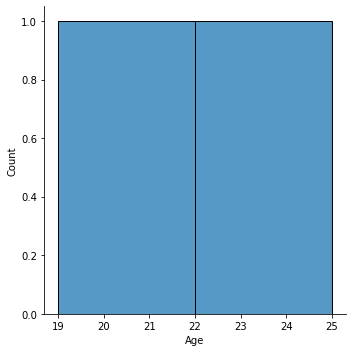

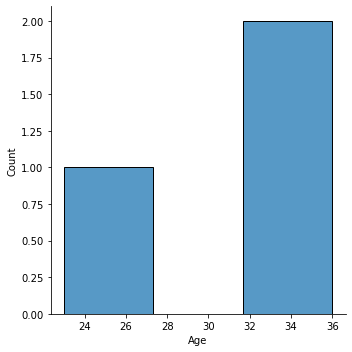

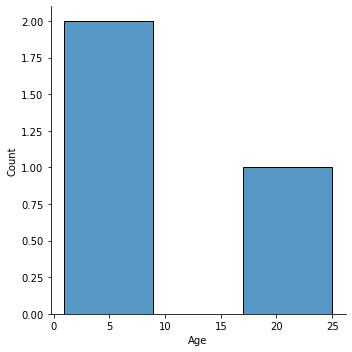

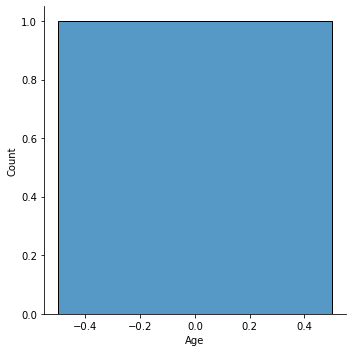

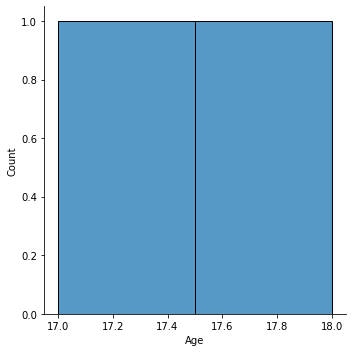

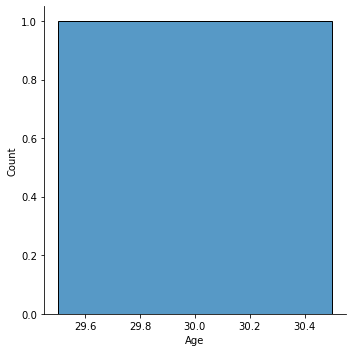

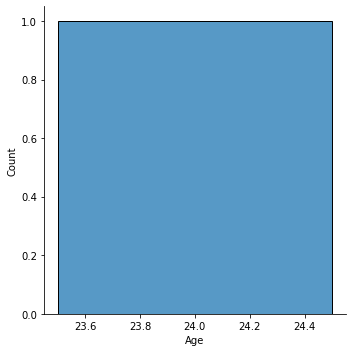

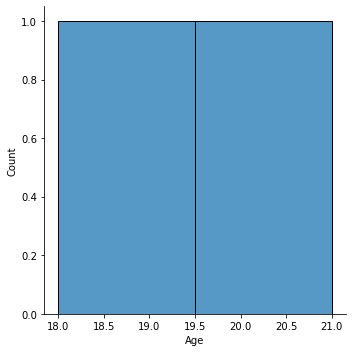

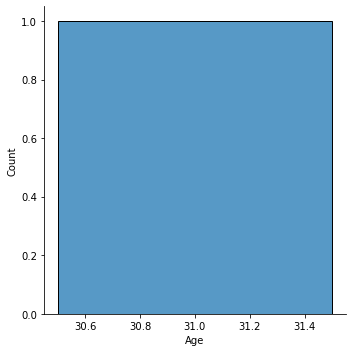

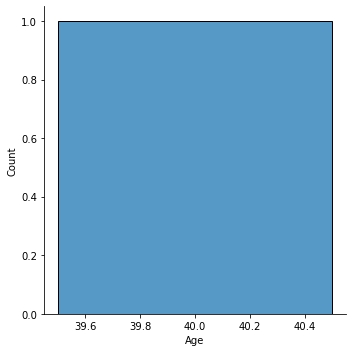

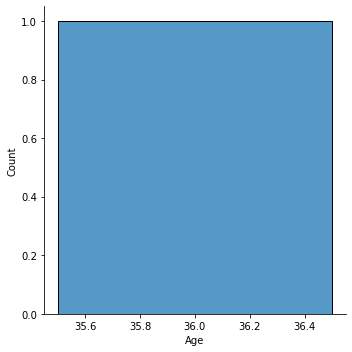

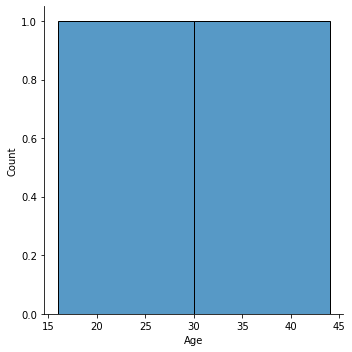

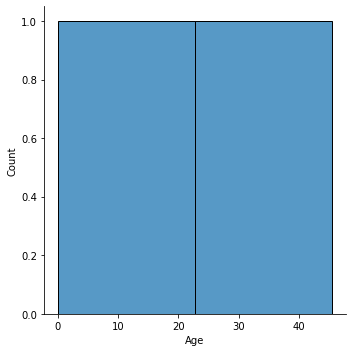

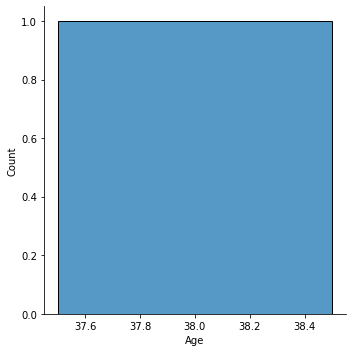

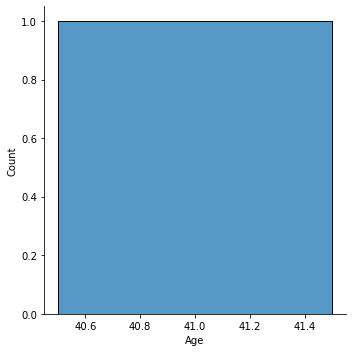

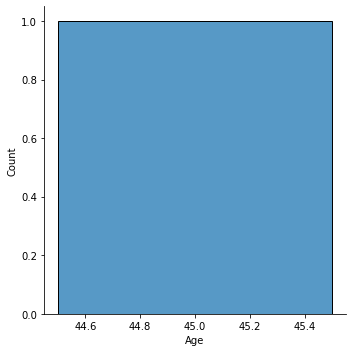

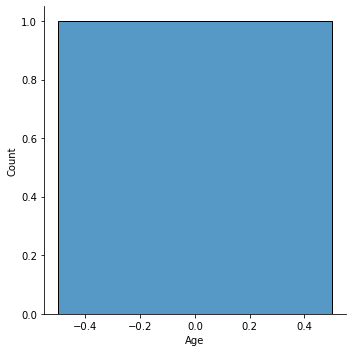

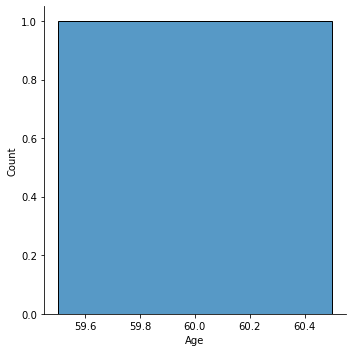

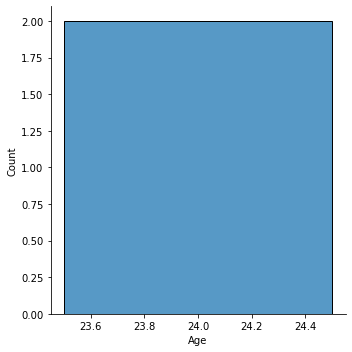

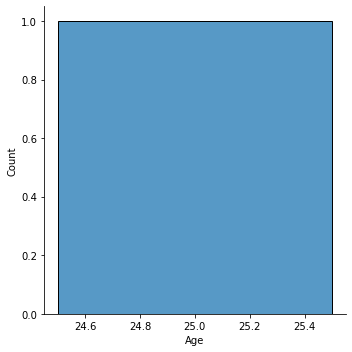

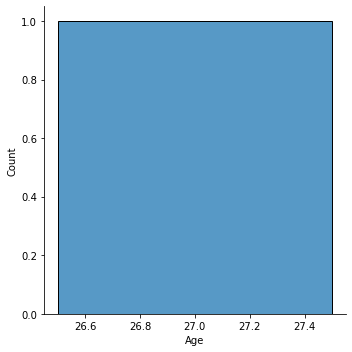

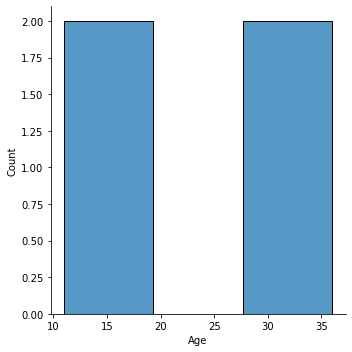

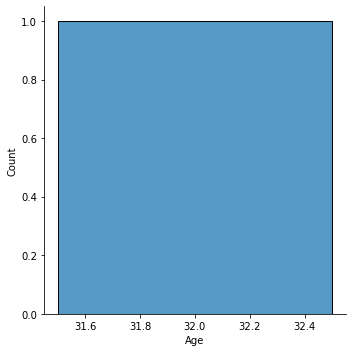

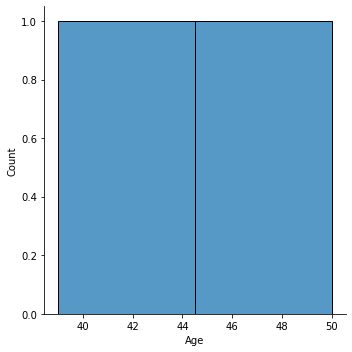

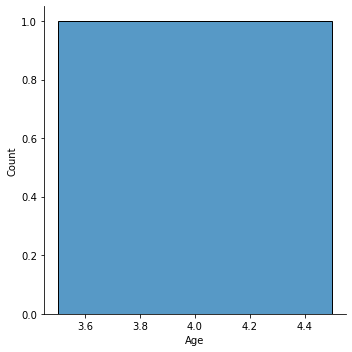

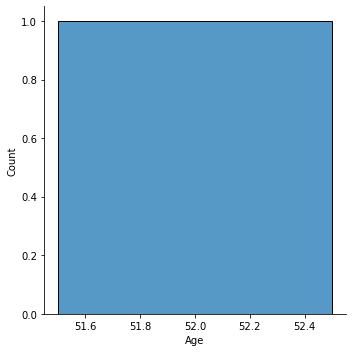

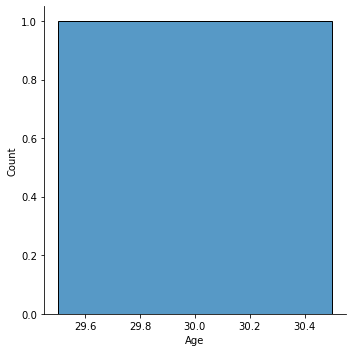

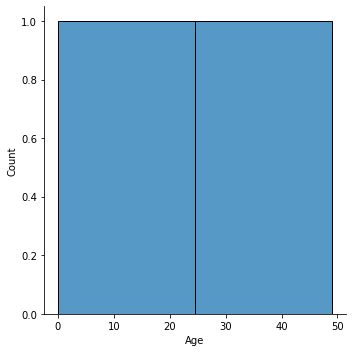

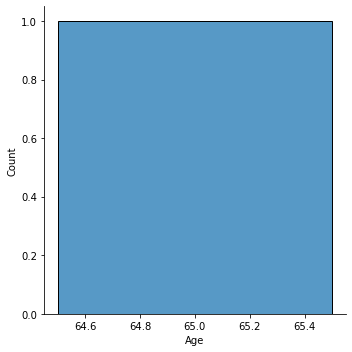

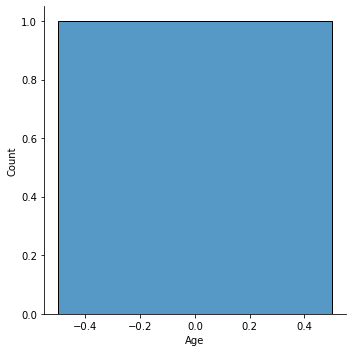

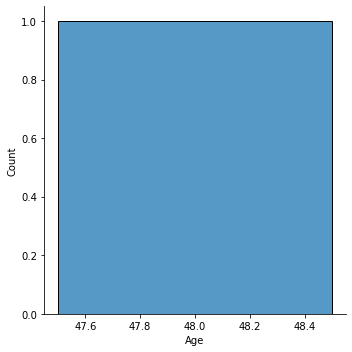

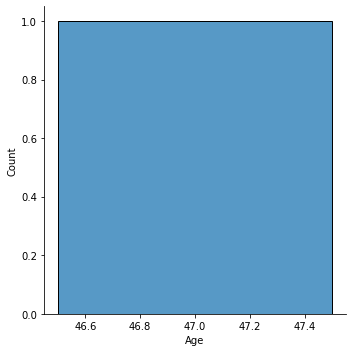

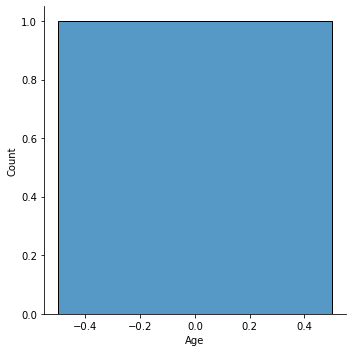

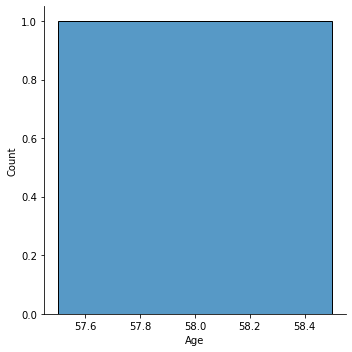

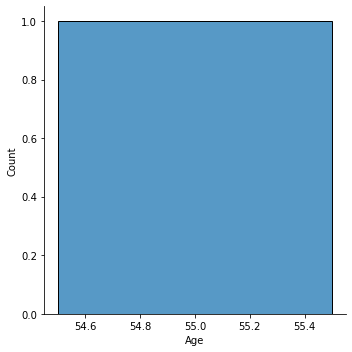

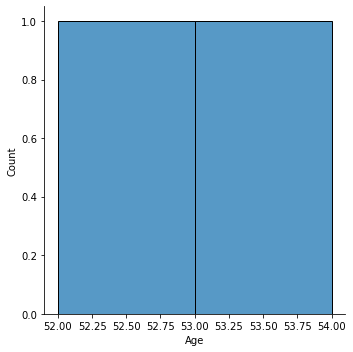

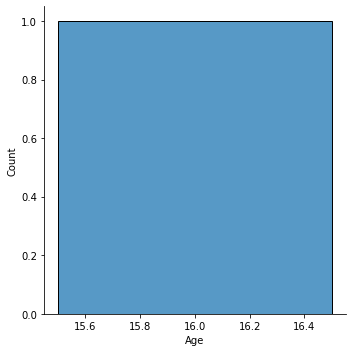

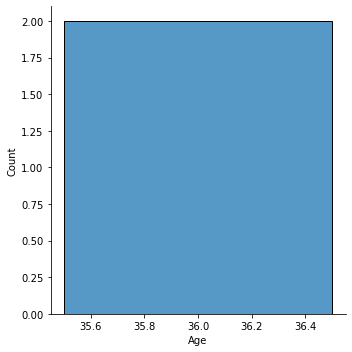

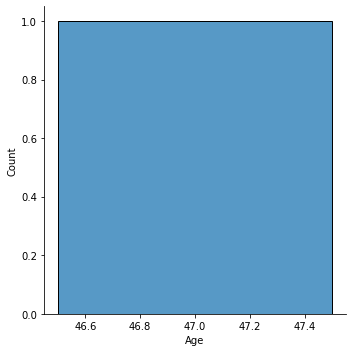

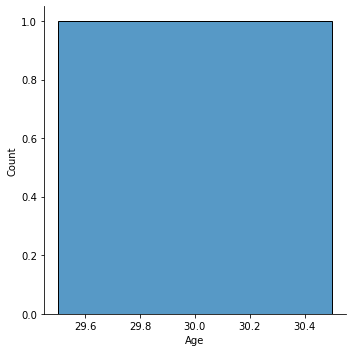

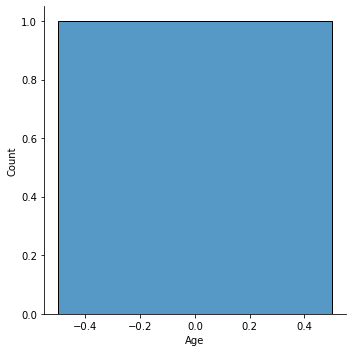

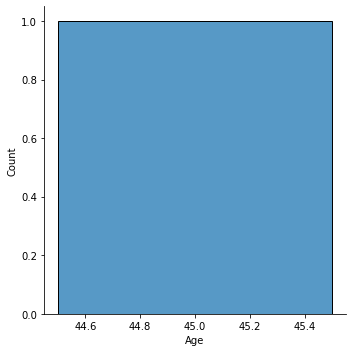

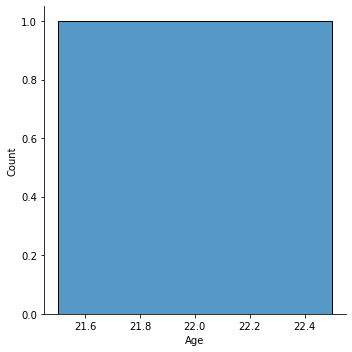

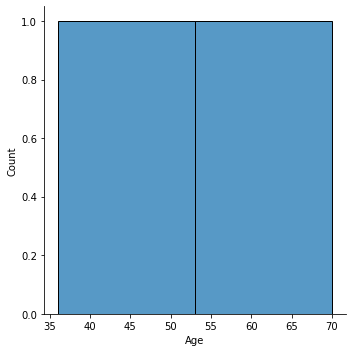

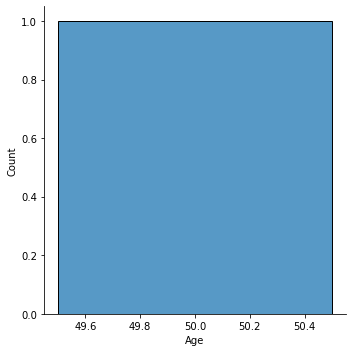

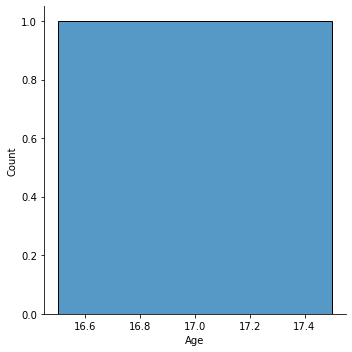

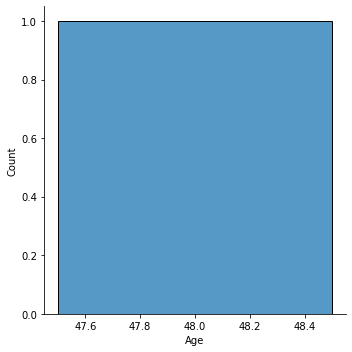

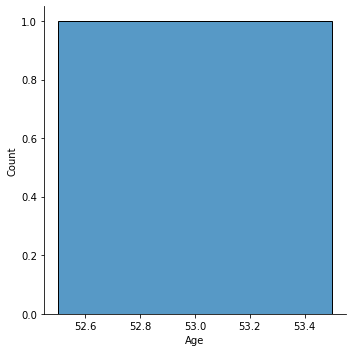

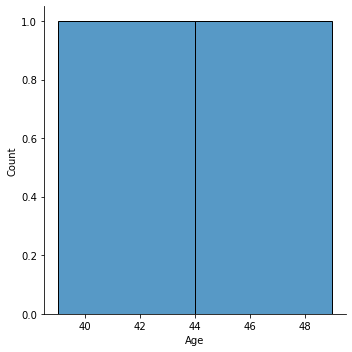

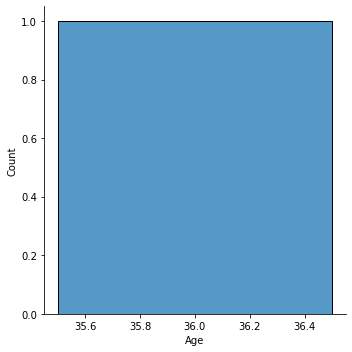

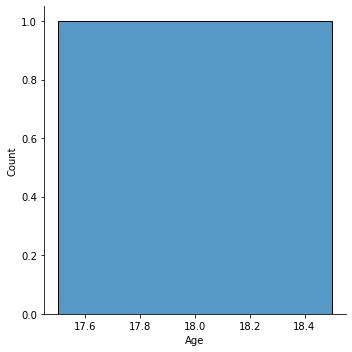

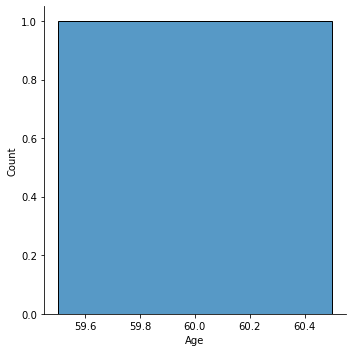

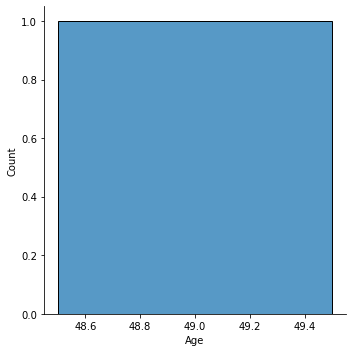

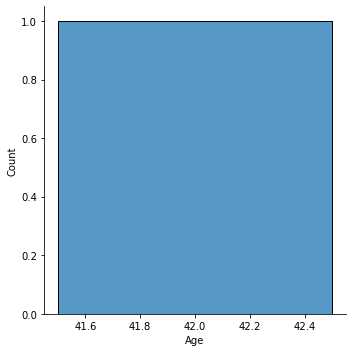

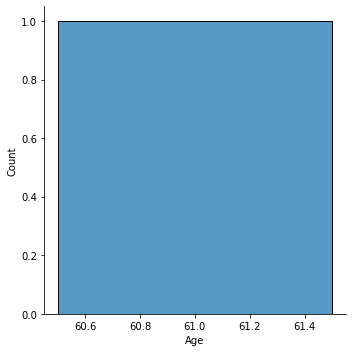

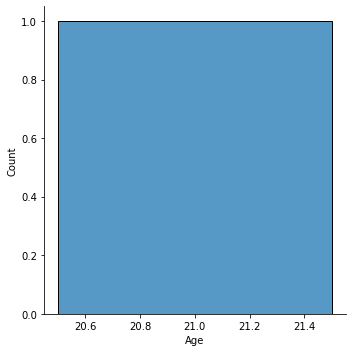

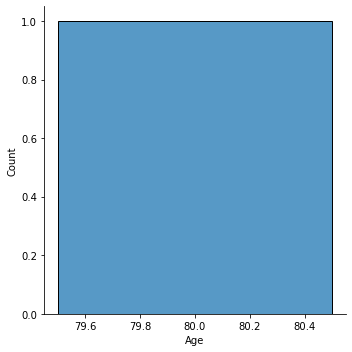

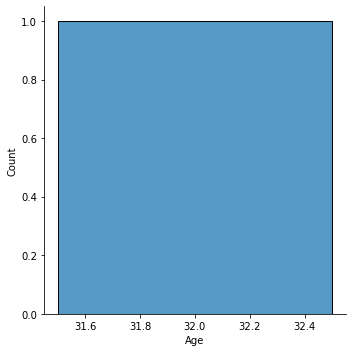

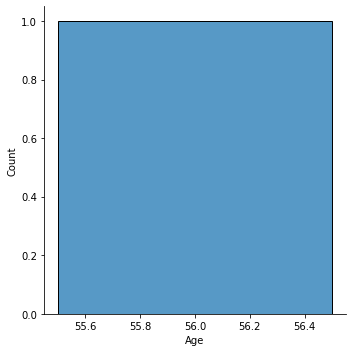

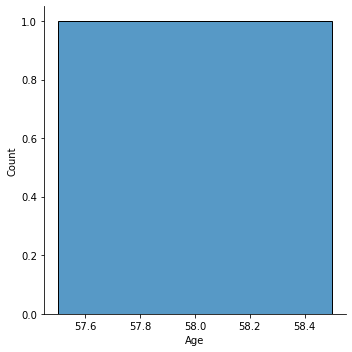

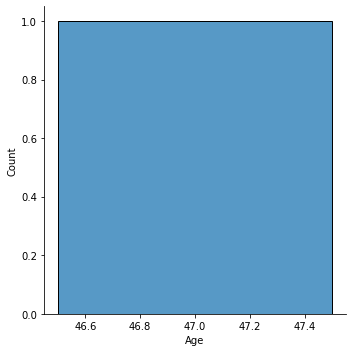

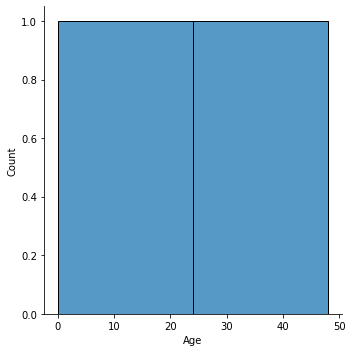

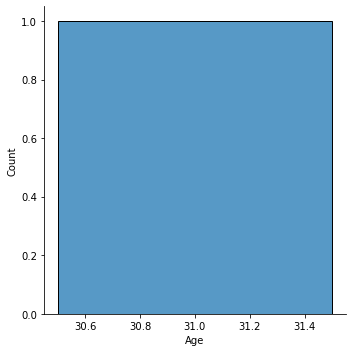

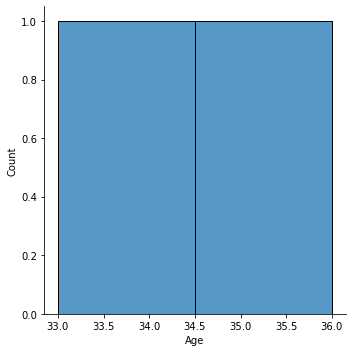

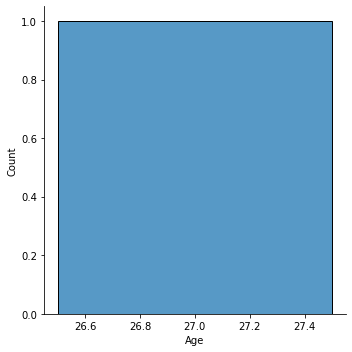

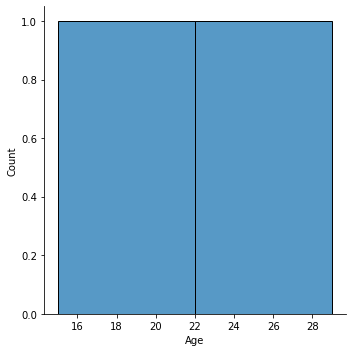

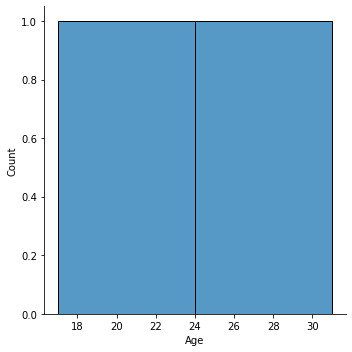

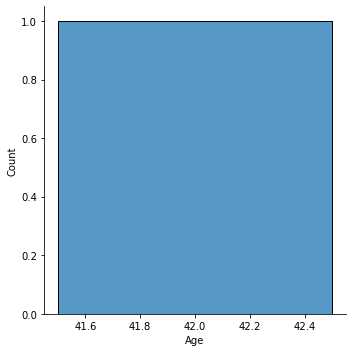

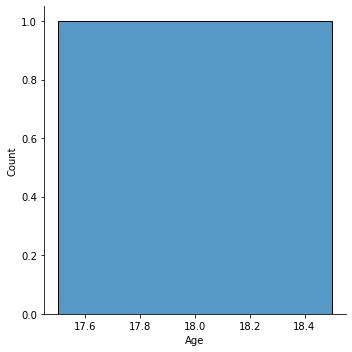

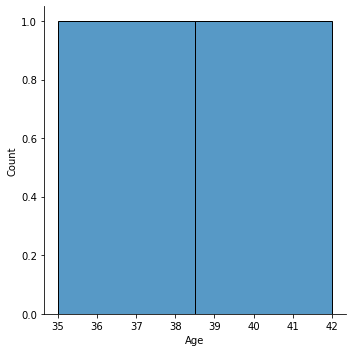

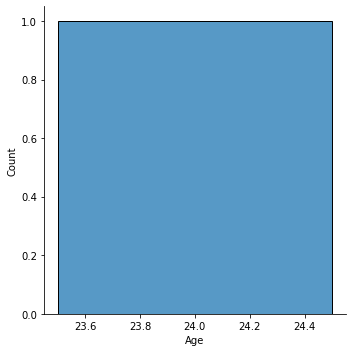

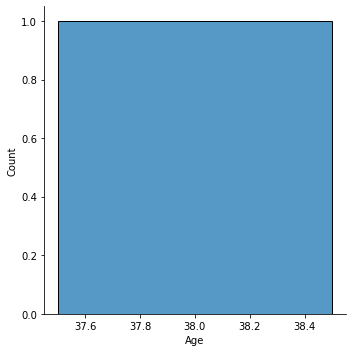

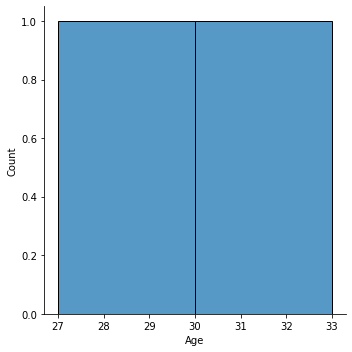

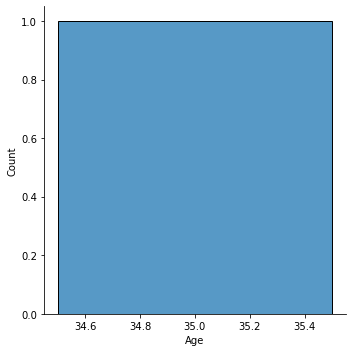

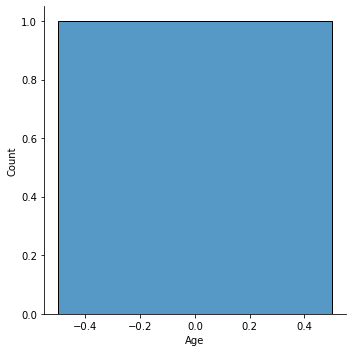

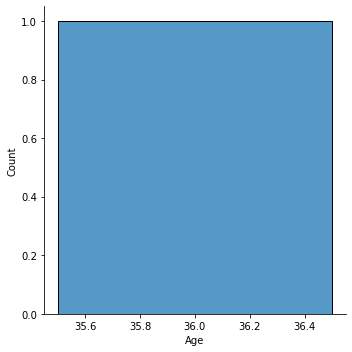

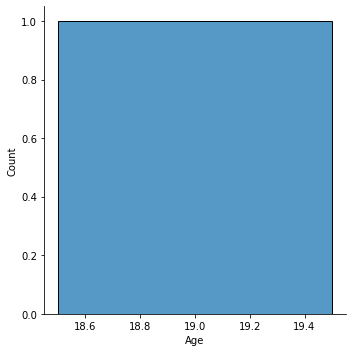

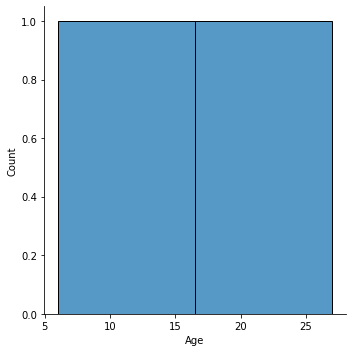

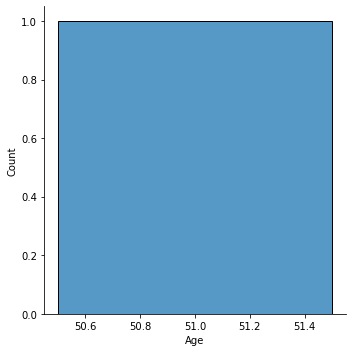

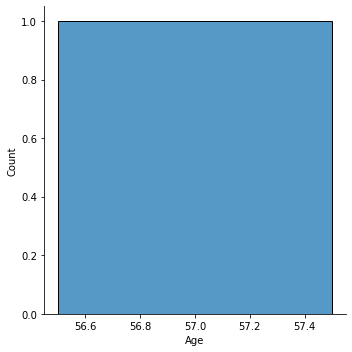

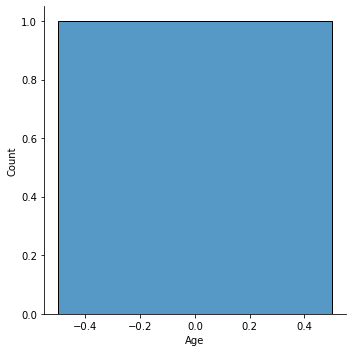

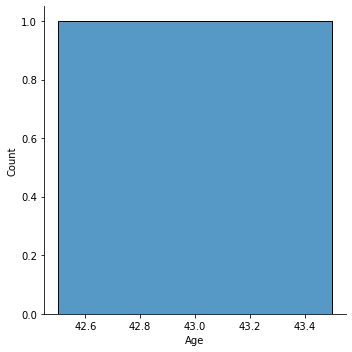

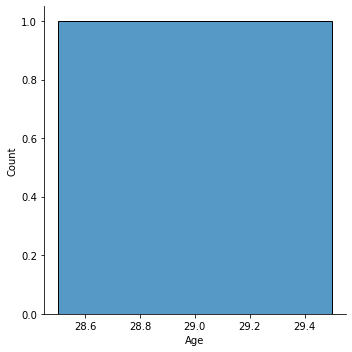

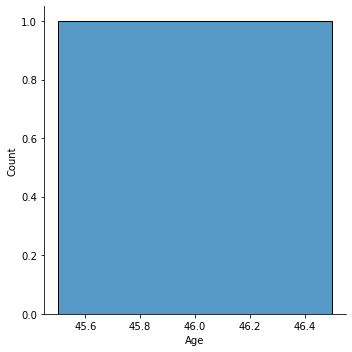

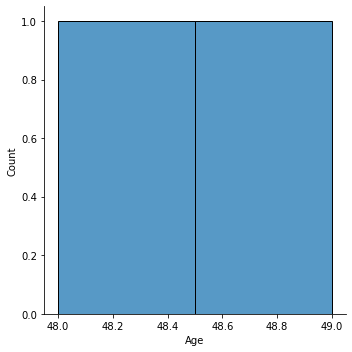

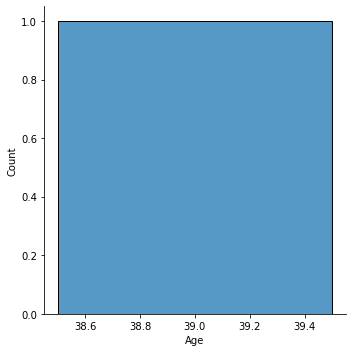

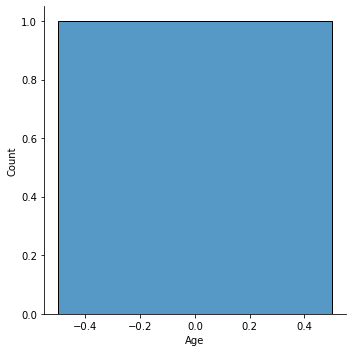

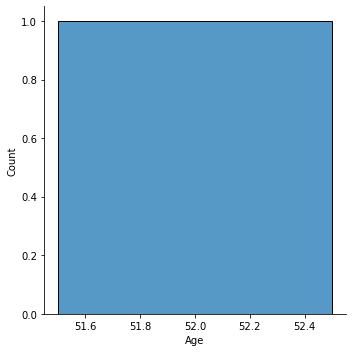

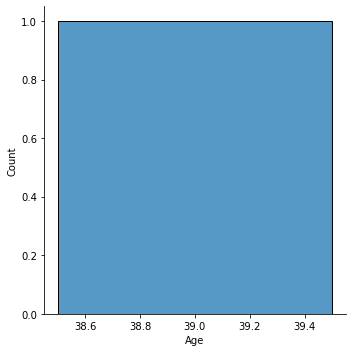

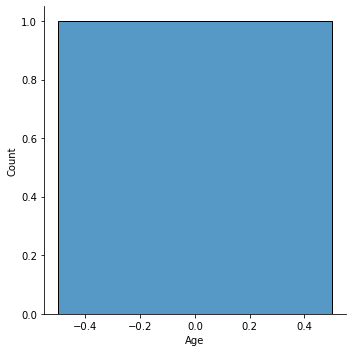

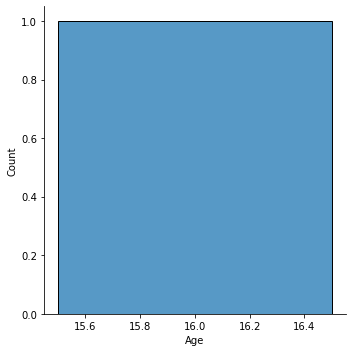

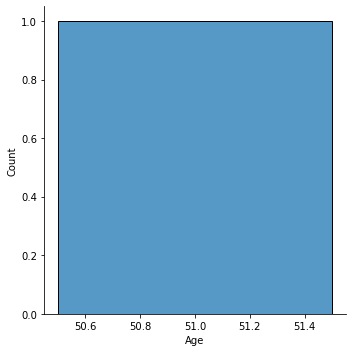

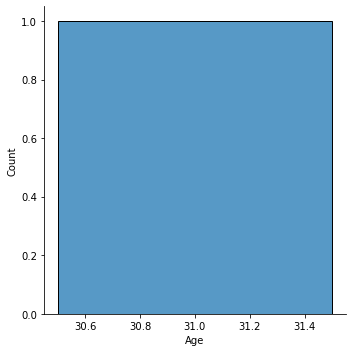

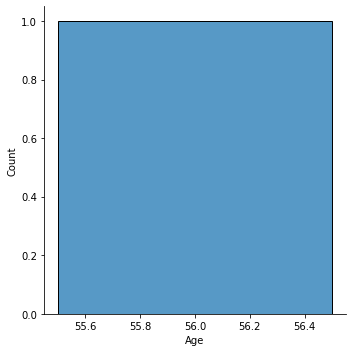

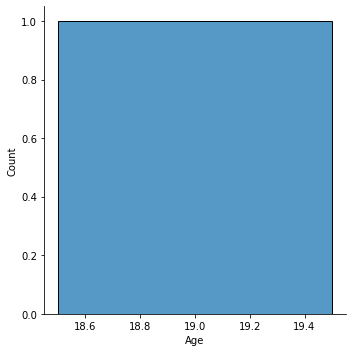

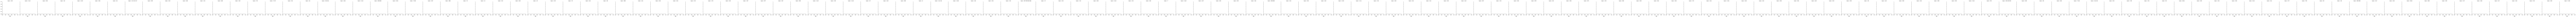

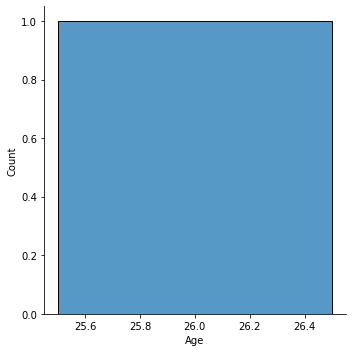

In [10]:
# 以 XXX 為例，先看 Cabin  出現值的特性

# 我們以  Age 為例，進行補植，補固定值
#補值前 平均值
print(Titanic_train['Age'].mean()) #age平均
print(Titanic_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(Titanic_train, col='Cabin')
g.map(sns.displot, 'Age', kde=False)

#補值0後
Titanic_train['Age']=Titanic_train['Age'].fillna(0)
print(Titanic_train['Age'].mean())
print(Titanic_train['Age'].std()) #age標準差
Titanic_train[Titanic_train['Age'].isnull().values==True]
#補完就沒有遺失值了，但是看到這樣的補值效果，平均值上有很明顯的差異，
# 連續型用分布圖行來看
g = sns.FacetGrid(Titanic_train, col='Cabin')
g.map(sns.displot, 'Age', kde=False)



In [19]:
#correct
# 以 Cabin 為例，先看 Cabin  出現值的特性
print(data["Cabin"].value_counts())


C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
C78                4
                  ..
A6                 1
C128               1
D46                1
C28                1
C99                1
Name: Cabin, Length: 186, dtype: int64


In [20]:
#* 方法1:遺失的屬於另一類。 
data['Cabin'].head(10)
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

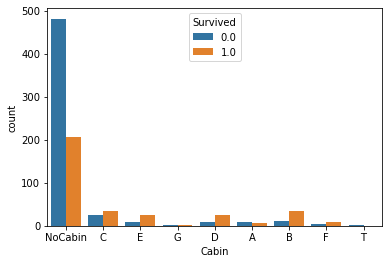

In [25]:
# 挑整後的 Cabin 觀察遺失的樣態
sns.countplot(x="Cabin", hue="Survived", data=data)
#結論，遺失的死亡率比較高

In [26]:
#數值計算
data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# NoCabin的比例和 T 較接近

,Cabin,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
7,NoCabin,0.299854
8,T,0.000000
